# Online Retailer Customer Segmentation

# Data description

The "Online Retail Transaction" dataset contains information on transactions made by customers through an online retail platform. The dataset includes data on the products that were purchased, the quantity of each product, the date and time of each transaction, the price of each product, the unique identifier for each customer who made a purchase, and the country where each customer is located. This dataset can be used to analyze customer behavior and preferences, identify popular products, and optimize pricing and marketing strategies. The dataset is well-suited for data analysis and machine learning applications, as it contains a large volume of transactional data that can be used to train predictive models and make data-driven decisions.



# Column Descriptors

 - StockCode: A code used to identify the product that was purchased
 - Description: A brief description of the product that was purchased
 - Quantity: The quantity of the product that was purchased
 - InvoiceDate: The date and time that the purchase was made
 - UnitPrice: The price of one unit of the product that was purchased
 - CustomerID: The unique identifier for the customer who made the purchase
 - Country: The country where the customer who made the purchase is located

In [748]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
# import geopandas as gpd
import matplotlib.pyplot as plt

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

Data read

In [749]:
df=pd.read_csv(r"E:\Projects\Clustering\Customer_segmentation\notebook\Online Retail.csv")

In [750]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55       17850  United Kingdom  
1  2010-12-01 08:26:00       3.39       17850  United Kingdom  
2  2010-12-01 08:26:00       2.75       17850  United Kingdom  
3  2010-12-01 08:26:00       3.39       17850  United Kingdom  
4  2010-12-01 08:26:00       3.39       17850  United Kingdom

Shape

In [751]:
df.shape

(541909, 8)

In [752]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


Nan value plot

In [753]:
def convert_nan_null_to_nan(df):
    # Convert "NAN" and "NULL" values to np.nan
    df.replace(["NAN", "NULL","nan"], np.nan, inplace=True)

    # Return the updated DataFrame
    return df
convert_nan_null_to_nan(df)

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

                InvoiceDate  UnitPrice  CustomerID         Country  
0       2010-12-01 08:26:00       2.55       17850  United Kingdom  
1       2010-12-01 08:26:00       3.39       17850  United Kingdom  
2       2010-12-01 08:26:00       2.75       17850  United Kingdom  
3       2010-12-01 08:26:00       3.39       17850  United Kingdom  
4       2010-12-01 08:26:00       3.39       17850  United Kingdom  
...                     ...        ...         ...             ...  
541904  2011-12-09 12:50:00       0.85       12680          France  
541905  2011-12-09 12:50:00       2.10       12680          France  
541906  2011-12-09 12:50:00       4.15       12680          France  
541907  2011-12-09 12:50:00       4.15       12680          France  
541908  2011-12-09 12:50:00       4.95       12680          France  

[541909 rows x 8 columns]

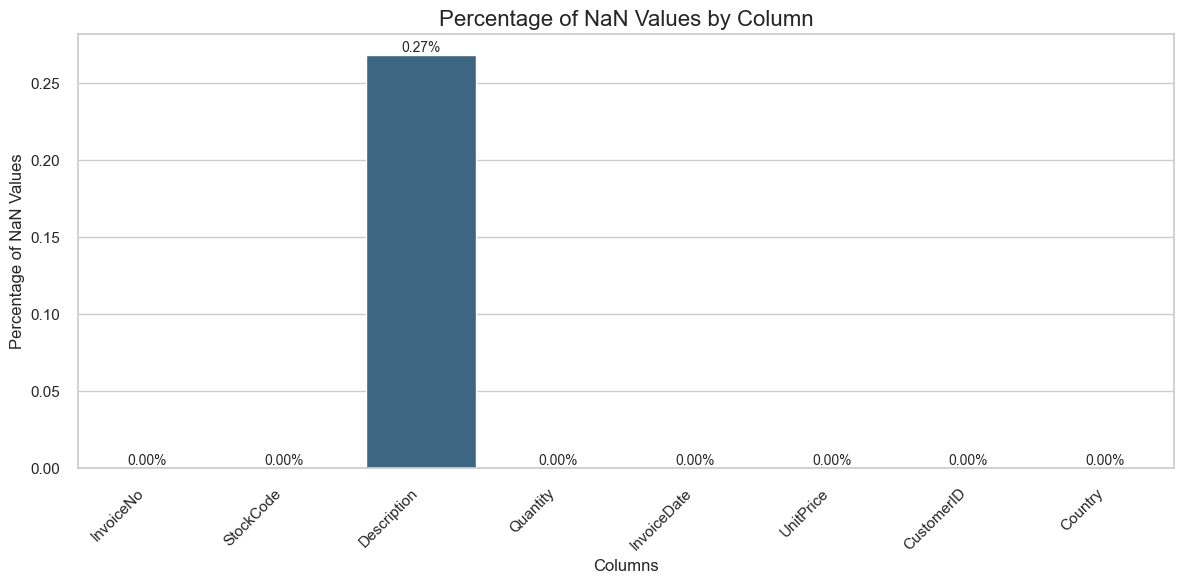

In [754]:
def plot_nan_percentages(df):
    # Calculate the percentage of NaN values in each column
    nan_percentages = (df.isna().sum() / len(df)) * 100

    # Set plot style
    sns.set(style='whitegrid')

    # Create the bar plot
    plt.figure(figsize=(12, 6))
    bar_plot = sns.barplot(x=nan_percentages.index, y=nan_percentages.values, palette='viridis')

    # Add labels and title
    plt.title('Percentage of NaN Values by Column', fontsize=16)
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Percentage of NaN Values', fontsize=12)

    # Rotate x-axis labels for better readability
    bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha='right')

    # Add value labels to the bars
    for p in bar_plot.patches:
        bar_plot.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                          ha='center', va='bottom', fontsize=10)

    # Show the plot
    plt.tight_layout()
    plt.show()
plot_nan_percentages(df)

In [755]:
df['CustomerID'].dtypes

dtype('int64')

In [756]:
print(" duplicated rows")
print(df.duplicated().sum())

 duplicated rows
5268


Duplicates

In [757]:
def drop_duplicates(df):
    """
    Drops duplicate rows from a pandas DataFrame and returns the modified DataFrame.
    
    Args:
        df (pandas.DataFrame): The DataFrame to remove duplicate rows from.
        
    Returns:
        pandas.DataFrame: The modified DataFrame with duplicate rows removed.
    """
    
    print(" Drop duplicate value")
    df = df.drop_duplicates()
    
    
    return df
df=drop_duplicates(df)

 Drop duplicate value


Describe

In [758]:
df.describe()

Quantity      UnitPrice     CustomerID
count  536641.000000  536641.000000  536641.000000
mean        9.620029       4.632656   15282.630153
std       219.130156      97.233118    1482.756881
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   14367.000000
50%         3.000000       2.080000   15287.000000
75%        10.000000       4.130000   16241.000000
max     80995.000000   38970.000000   18287.000000

Quanity 

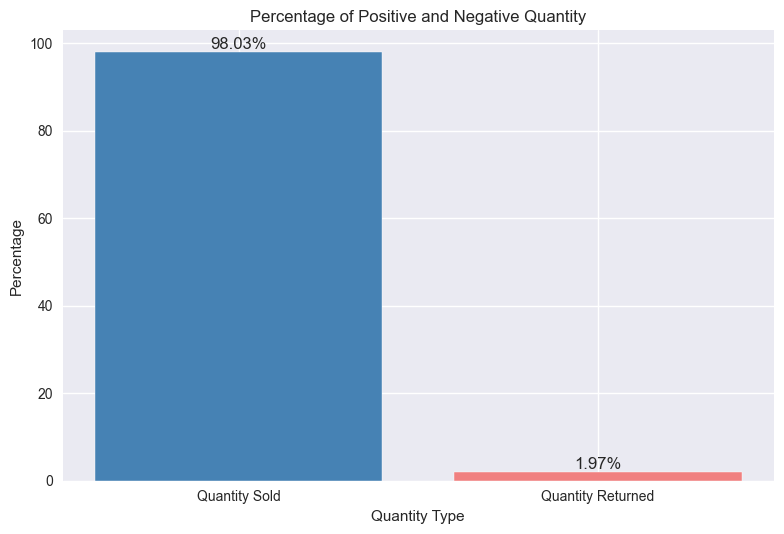

In [759]:
import matplotlib.pyplot as plt

def plot_quantity_percentages(df):
    """
    Plots a bar chart showing the percentages of positive and negative values in the 'Quantity' column.

    Args:
        df (pandas.DataFrame): The DataFrame to analyze and plot.
    """
    positive_count = (df['Quantity'] > 0).sum()
    negative_count = (df['Quantity'] < 0).sum()
    total_count = positive_count + negative_count
    
    positive_percentage = (positive_count / total_count) * 100
    negative_percentage = (negative_count / total_count) * 100
    
    # Set plot style
    plt.style.use('seaborn')
    
    # Create the bar plot
    labels = ['Quantity Sold', 'Quantity Returned']
    percentages = [positive_percentage, negative_percentage]
    colors = ['steelblue', 'lightcoral']
    
    plt.bar(labels, percentages, color=colors)
    
    # Set plot title and labels
    plt.title('Percentage of Positive and Negative Quantity')
    plt.xlabel('Quantity Type')
    plt.ylabel('Percentage')
    
    # Print the percentages on the bars
    for i, percentage in enumerate(percentages):
        plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom')
    
    # Display the plot
    plt.tight_layout()
    plt.show()
    
plot_quantity_percentages(df)


In [760]:
def drop_negative_rows(dataframe, column_name):
    return dataframe[dataframe[column_name] >= 0]

df=drop_negative_rows(df,'Quantity')

#### Unit Price 

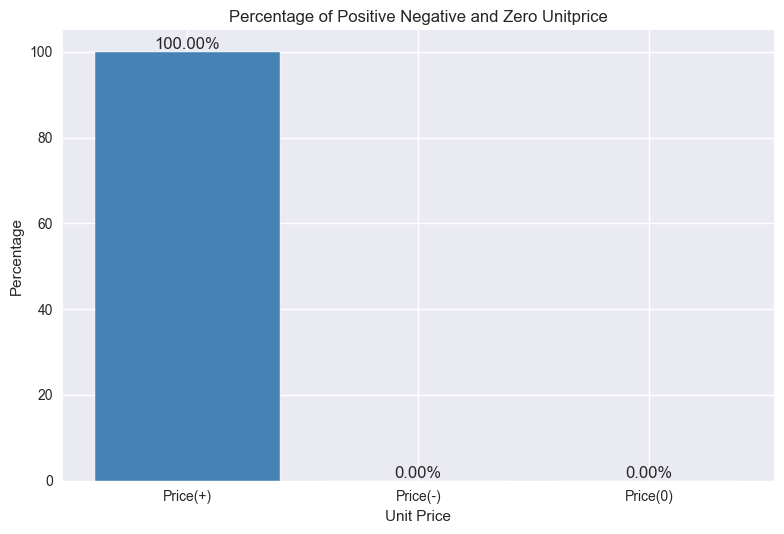

In [761]:
def plot_quantity_percentages(df):
    """
    Plots a bar chart showing the percentages of positive and negative values in the 'Quantity' column.

    Args:
        df (pandas.DataFrame): The DataFrame to analyze and plot.
    """
    positive_count = (df['UnitPrice'] > 0).sum()
    negative_count = (df['UnitPrice'] < 0).sum()
    zero_count     = (df['UnitPrice'] < 0).sum()
    total_count = positive_count + negative_count
    
    positive_percentage = (positive_count / total_count) * 100
    negative_percentage = (negative_count / total_count) * 100
    zero_count = (zero_count / total_count) * 100
    
    # Set plot style
    plt.style.use('seaborn')
    
    # Create the bar plot
    labels = ['Price(+)', 'Price(-)','Price(0)']
    percentages = [positive_percentage, negative_percentage,zero_count]
    colors = ['steelblue', 'lightcoral']
    
    plt.bar(labels, percentages, color=colors)
    
    # Set plot title and labels
    plt.title('Percentage of Positive Negative and Zero Unitprice')
    plt.xlabel('Unit Price')
    plt.ylabel('Percentage')
    
    # Print the percentages on the bars
    for i, percentage in enumerate(percentages):
        plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom')
    
    # Display the plot
    plt.tight_layout()
    plt.show()
plot_quantity_percentages(df)


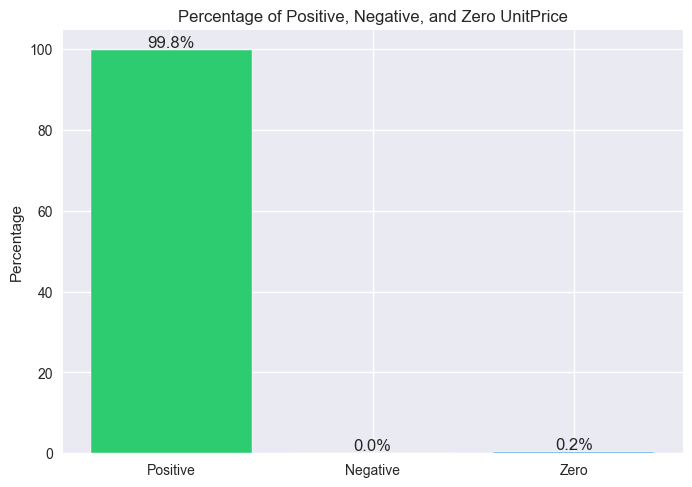

In [762]:
def plot_unitprice_percentages(df):
    # Filter rows with positive, negative, and zero UnitPrice values
    positive_df = df[df['UnitPrice'] > 0]
    negative_df = df[df['UnitPrice'] < 0]
    zero_df = df[df['UnitPrice'] == 0]

    # Calculate the percentages
    total_rows = len(df)
    positive_percentage = (len(positive_df) / total_rows) * 100
    negative_percentage = (len(negative_df) / total_rows) * 100
    zero_percentage = (len(zero_df) / total_rows) * 100

    # Create a bar plot
    labels = ['Positive', 'Negative', 'Zero']
    percentages = [positive_percentage, negative_percentage, zero_percentage]
    colors = ['#2ecc71', '#e74c3c', '#3498db']  # Color palette for the bars
    plt.bar(labels, percentages, color=colors)
    plt.ylabel('Percentage')
    plt.title('Percentage of Positive, Negative, and Zero UnitPrice')

    # Add value labels to the bars
    for i, percentage in enumerate(percentages):
        plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom')

    # Remove the top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Display the plot
    plt.show()
plot_unitprice_percentages(df)

1. Unit_Price (+) - Price of the sold item
2. Unit price (0) - Product might be free
 

In [763]:
df = df[df['UnitPrice'] >= 0]

In [764]:
# Filter for unit_price equal to zero
df_zero_unit_price = df[df['UnitPrice'] == 0]
df_zero_unit_price.head()

InvoiceNo StockCode Description  Quantity          InvoiceDate  \
622     536414     22139         NaN        56  2010-12-01 11:52:00   
1970    536545     21134         NaN         1  2010-12-01 14:32:00   
1971    536546     22145         NaN         1  2010-12-01 14:33:00   
1972    536547     37509         NaN         1  2010-12-01 14:33:00   
1987    536549    85226A         NaN         1  2010-12-01 14:34:00   

      UnitPrice  CustomerID         Country  
622         0.0       15287  United Kingdom  
1970        0.0       15287  United Kingdom  
1971        0.0       15287  United Kingdom  
1972        0.0       15287  United Kingdom  
1987        0.0       15287  United Kingdom

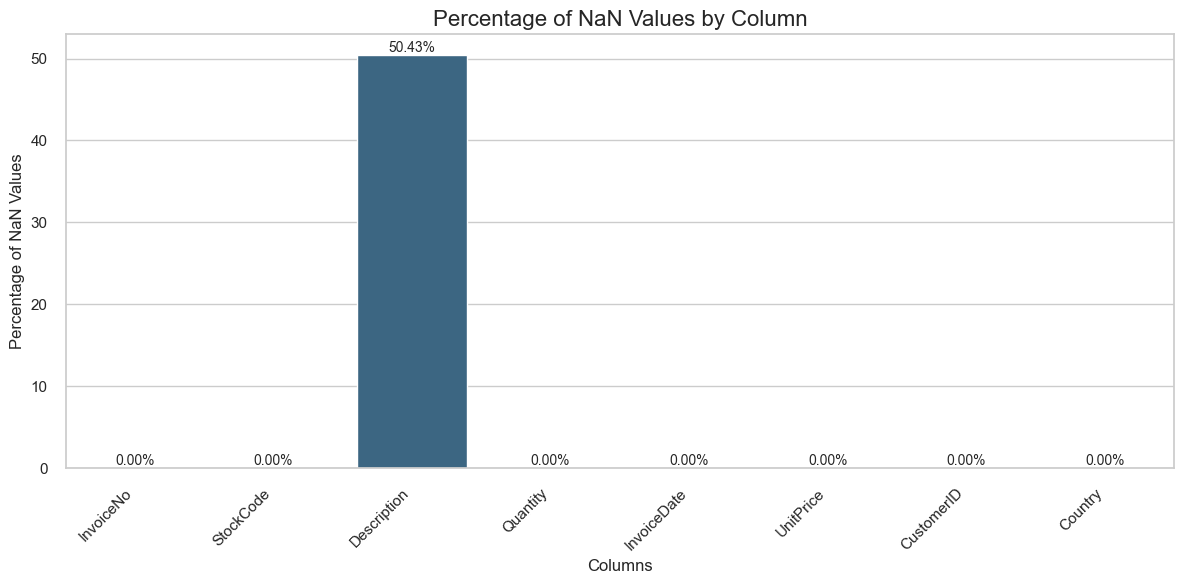

In [765]:
plot_nan_percentages(df_zero_unit_price)


In the filtered dataframe consisting of unit_price=0 we dont have discription of more than 50% of products


Quantity | Unit Price

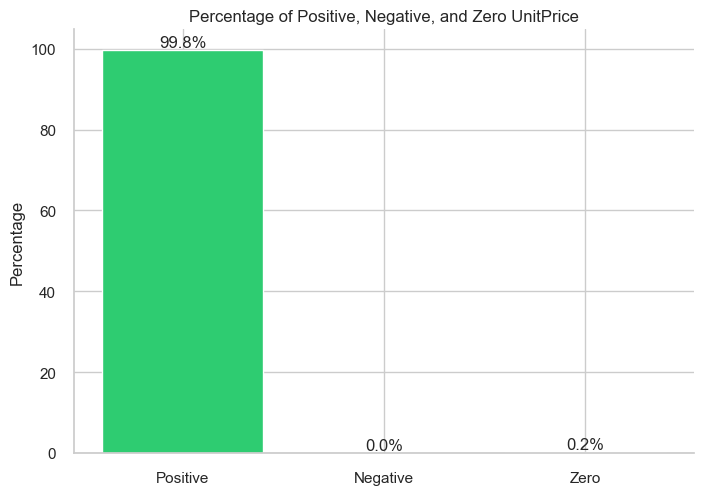

In [766]:
plot_unitprice_percentages(df)

Considering dropping the data rows with unit price = 0 

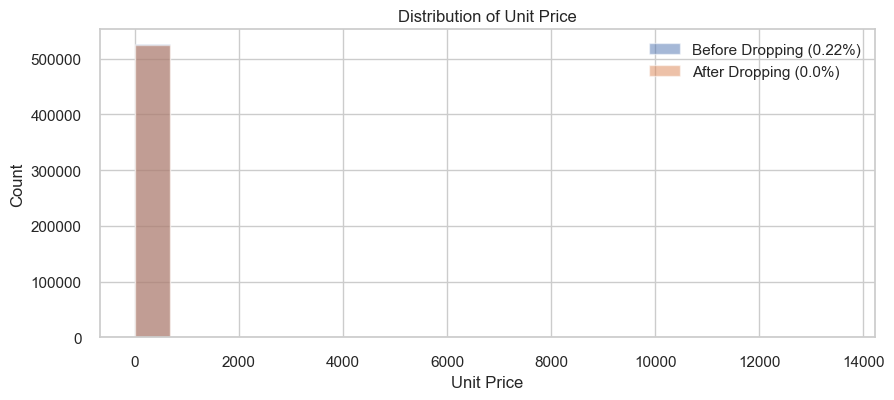

In [767]:

def plot_data_change_before_after(df):
    # Calculate the percentage of rows with UnitPrice = 0 before the operation
    before_percentage = (df['UnitPrice'] == 0).mean() * 100

    # Dropping rows where UnitPrice is 0
    df_filtered = df[df['UnitPrice'] != 0]

    # Calculate the percentage of rows with UnitPrice = 0 after the operation
    after_percentage = (df_filtered['UnitPrice'] == 0).mean() * 100

    # Create a single chart to display before and after data
    plt.figure(figsize=(10, 4))
    plt.hist(df['UnitPrice'], bins=20, alpha=0.5, label='Before Dropping ({}%)'.format(round(before_percentage, 2)))
    plt.hist(df_filtered['UnitPrice'], bins=20, alpha=0.5, label='After Dropping ({}%)'.format(round(after_percentage, 2)))
    plt.xlabel('Unit Price')
    plt.ylabel('Count')
    plt.title('Distribution of Unit Price')
    plt.legend()

    # Show the plot
    plt.show()
plot_data_change_before_after(df)

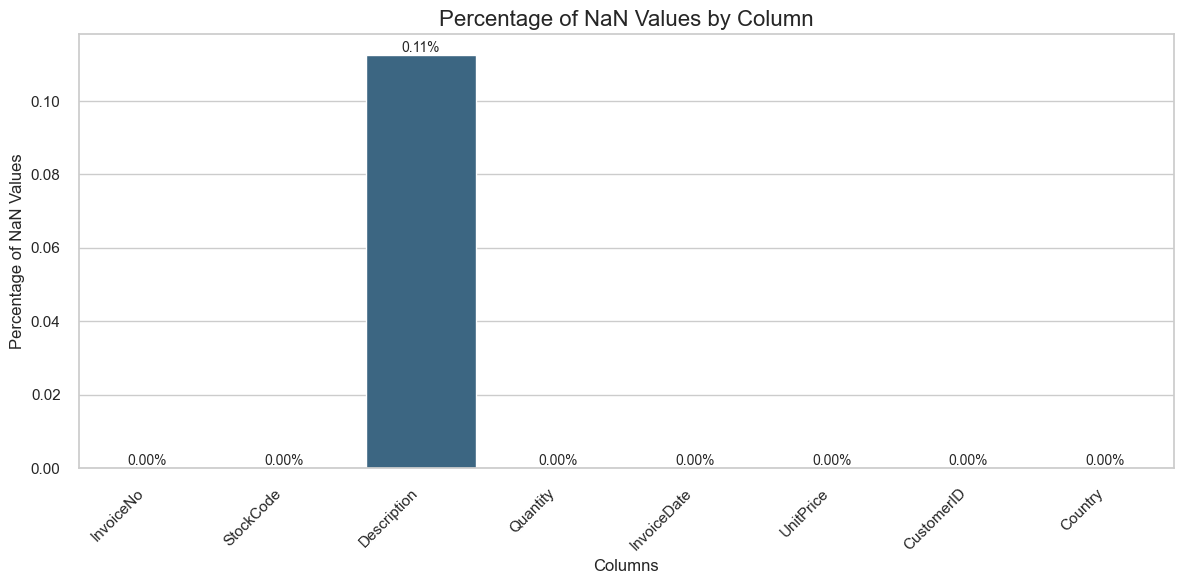

In [768]:
plot_nan_percentages(df)

Droppig nan rows from dataframe

In [769]:
df.dropna(inplace=True)

In [770]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### Invoice Number

Percentage of rows starting with 'C': 0.00%
Percentage of rows not starting with 'C': 100.00%


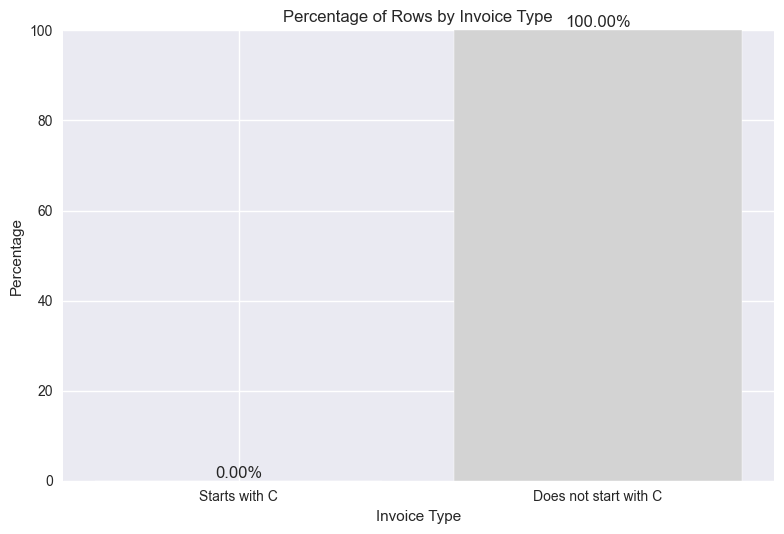

In [771]:
def plot_invoice_percentage(df):
    """
    Plots the percentages of rows starting with 'C' and not starting with 'C' in a DataFrame.
    
    Args:
        df (pandas.DataFrame): The DataFrame to analyze and plot.
    """
    total_rows = df.shape[0]
    c_start_count = df[df['InvoiceNo'].str.startswith('C')].shape[0]
    c_start_percentage = (c_start_count / total_rows) * 100
    not_c_start_count = total_rows - c_start_count
    not_c_start_percentage = (not_c_start_count / total_rows) * 100
    
    # Set plot style
    plt.style.use('seaborn')
    
    # Create the bar plot
    bar_values = [c_start_percentage, not_c_start_percentage]
    bar_labels = ['Starts with C', 'Does not start with C']
    bar_colors = ['steelblue', 'lightgray']
    plt.bar(bar_labels, bar_values, color=bar_colors)
    
    # Set plot title and labels
    plt.title('Percentage of Rows by Invoice Type')
    plt.xlabel('Invoice Type')
    plt.ylabel('Percentage')
    
    # Print the percentages on the bar chart
    for i, value in enumerate(bar_values):
        plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')
    
    # Print the percentages
    print(f"Percentage of rows starting with 'C': {c_start_percentage:.2f}%")
    print(f"Percentage of rows not starting with 'C': {not_c_start_percentage:.2f}%")
    
    # Display the plot
    plt.ylim([0, 100])  # Set y-axis limits from 0 to 100
    plt.tight_layout()
    plt.show()
    
plot_invoice_percentage(df)

#### Description 

- The "Description" column in the Online Retail Transactions dataset provides a brief description of each product purchased in a transaction.
- The descriptions are based on the retailer's internal product codes and may not be very detailed or consistent. Some descriptions include information such as the type of product, the brand, the color, and the size
- Description column can provide valuable insights into which products are being purchased and can be used for various types of analysis, such as identifying popular products or analyzing sales trends for specific product categories.

In [772]:
df['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 525460, dtype: object

In [773]:
# some rows in description column are having question mark.  so taht filling that values with np.nan

df.replace(to_replace = '??', value = np.nan, inplace=True)
df.replace(to_replace = '?', value = np.nan, inplace=True)

In [774]:
df.dropna(inplace=True)

In [775]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55       17850  United Kingdom  
1  2010-12-01 08:26:00       3.39       17850  United Kingdom  
2  2010-12-01 08:26:00       2.75       17850  United Kingdom  
3  2010-12-01 08:26:00       3.39       17850  United Kingdom  
4  2010-12-01 08:26:00       3.39       17850  United Kingdom

#### StockCode

StockCode
-  the "StockCode" column in the Online Retail Transactions dataset refers to a unique identifier assigned to each product sold by the retailer. 
- The StockCode column can be useful for identifying specific products and tracking their sales over time. It may also be used to group products by category, brand, or other attributes.
- When working with the StockCode column, it may be helpful to review the product descriptions in the Description column to get a better understanding of what each code represents. You may also want to consider preprocessing the data to group similar products together or standardize the codes if possible.

In [776]:
df.shape

(525454, 8)

Grouped Data - Stocke Code

In [777]:
grouped_data = df.groupby('StockCode')['Description'].apply(list).reset_index()
grouped_data

StockCode                                        Description
0            10002  [INFLATABLE POLITICAL GLOBE , INFLATABLE POLIT...
1            10080  [GROOVY CACTUS INFLATABLE, GROOVY CACTUS INFLA...
2            10120  [DOGGY RUBBER, DOGGY RUBBER, DOGGY RUBBER, DOG...
3           10123C  [HEARTS WRAPPING TAPE , HEARTS WRAPPING TAPE ,...
4           10124A  [SPOTS ON RED BOOKCOVER TAPE, SPOTS ON RED BOO...
...            ...                                                ...
3920  gift_0001_20  [Dotcomgiftshop Gift Voucher £20.00, Dotcomgif...
3921  gift_0001_30  [Dotcomgiftshop Gift Voucher £30.00, Dotcomgif...
3922  gift_0001_40  [Dotcomgiftshop Gift Voucher £40.00, Dotcomgif...
3923  gift_0001_50  [Dotcomgiftshop Gift Voucher £50.00, Dotcomgif...
3924             m                                           [Manual]

[3925 rows x 2 columns]

G -Stock code and price 

In [778]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [779]:


grouped_df = df.groupby('StockCode').agg({'Quantity': 'sum', 'Description': 'first'}).reset_index()
grouped_df.columns = ['StockCode', 'TotalQuantity', 'Description']


In [780]:
grouped_df

StockCode  TotalQuantity                         Description
0            10002            860         INFLATABLE POLITICAL GLOBE 
1            10080            325            GROOVY CACTUS INFLATABLE
2            10120            192                        DOGGY RUBBER
3           10123C              5               HEARTS WRAPPING TAPE 
4           10124A             16         SPOTS ON RED BOOKCOVER TAPE
...            ...            ...                                 ...
3920  gift_0001_20             20  Dotcomgiftshop Gift Voucher £20.00
3921  gift_0001_30              7  Dotcomgiftshop Gift Voucher £30.00
3922  gift_0001_40              3  Dotcomgiftshop Gift Voucher £40.00
3923  gift_0001_50              4  Dotcomgiftshop Gift Voucher £50.00
3924             m              1                              Manual

[3925 rows x 3 columns]

Top Products purchased 

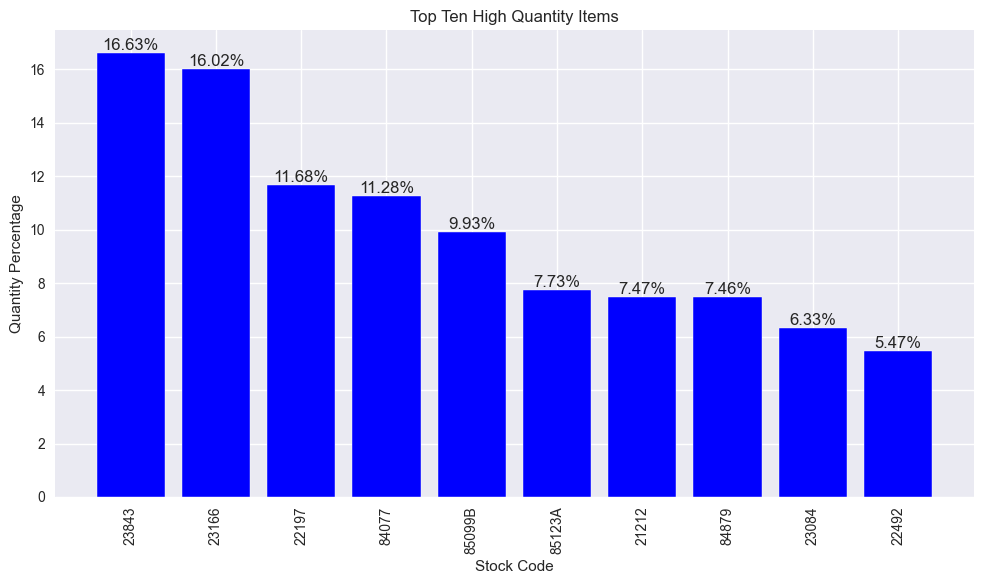

Descriptions:
1. Stock Code: 23843 | Description: PAPER CRAFT , LITTLE BIRDIE | Quantity Percentage: 16.63%
2. Stock Code: 23166 | Description: MEDIUM CERAMIC TOP STORAGE JAR | Quantity Percentage: 16.02%
3. Stock Code: 22197 | Description: SMALL POPCORN HOLDER | Quantity Percentage: 11.68%
4. Stock Code: 84077 | Description: WORLD WAR 2 GLIDERS ASSTD DESIGNS | Quantity Percentage: 11.28%
5. Stock Code: 85099B | Description: JUMBO BAG RED RETROSPOT | Quantity Percentage: 9.93%
6. Stock Code: 85123A | Description: WHITE HANGING HEART T-LIGHT HOLDER | Quantity Percentage: 7.73%
7. Stock Code: 21212 | Description: PACK OF 72 RETROSPOT CAKE CASES | Quantity Percentage: 7.47%
8. Stock Code: 84879 | Description: ASSORTED COLOUR BIRD ORNAMENT | Quantity Percentage: 7.46%
9. Stock Code: 23084 | Description: RABBIT NIGHT LIGHT | Quantity Percentage: 6.33%
10. Stock Code: 22492 | Description: MINI PAINT SET VINTAGE  | Quantity Percentage: 5.47%


In [781]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def plot_top_ten_high_quantity_items(grouped_df):
    # Sort the DataFrame by TotalQuantity in descending order
    sorted_df = grouped_df.sort_values(by='TotalQuantity', ascending=False)

    # Take the top ten rows
    top_ten_df = sorted_df.head(10).copy()

    # Calculate the quantity percentage
    total_quantity = top_ten_df['TotalQuantity'].sum()
    top_ten_df['QuantityPercentage'] = (top_ten_df['TotalQuantity'] / total_quantity) * 100

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(top_ten_df['StockCode'], top_ten_df['QuantityPercentage'], color='blue')

    # Set the x-axis and y-axis labels
    ax.set_xlabel('Stock Code')
    ax.set_ylabel('Quantity Percentage')

    # Set the plot title
    ax.set_title('Top Ten High Quantity Items')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Add data labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Print the descriptions with StockCode, Quantity Percentage, and numbering
    print("Descriptions:")
    for i, (bar, row) in enumerate(zip(bars, top_ten_df.iterrows()), start=1):
        stock_code = row[1]['StockCode']
        description = row[1]['Description']
        quantity_percentage = row[1]['QuantityPercentage']
        print(f"{i}. Stock Code: {stock_code} | Description: {description} | Quantity Percentage: {quantity_percentage:.2f}%")


plot_top_ten_high_quantity_items(grouped_df)

#### Customer ID

In [782]:
df['CustomerID'].nunique()

4339

Group Data - Customer Data and quantity

In [783]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55       17850  United Kingdom  
1  2010-12-01 08:26:00       3.39       17850  United Kingdom  
2  2010-12-01 08:26:00       2.75       17850  United Kingdom  
3  2010-12-01 08:26:00       3.39       17850  United Kingdom  
4  2010-12-01 08:26:00       3.39       17850  United Kingdom

In [784]:
# Group by 'customer ID' and calculate the sum of 'quantity'
grouped_df = df.groupby('CustomerID')['Quantity'].sum()

# Display the resulting DataFrame
print(grouped_df)

CustomerID
12346    74215
12347     2458
12348     2341
12349      631
12350      197
         ...  
18280       45
18281       54
18282      103
18283     1357
18287     1586
Name: Quantity, Length: 4339, dtype: int64


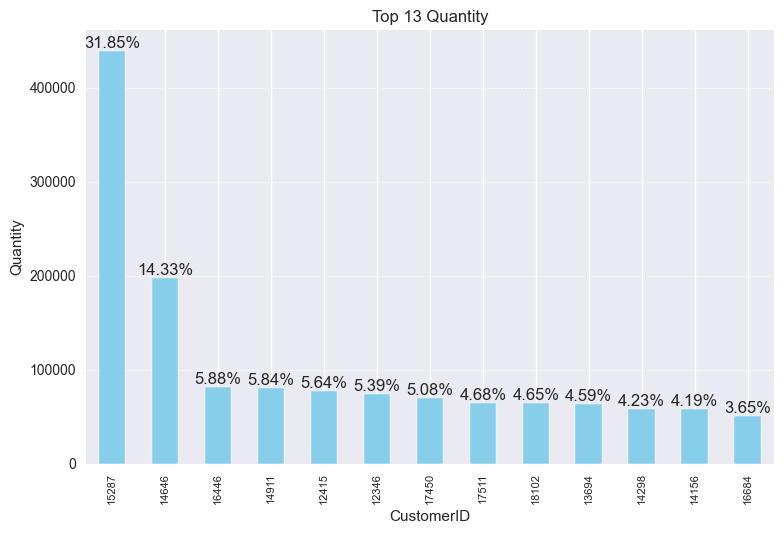

In [785]:
def plot_top_values(series, top_n):
    # Get the top N values
    top_values = series.nlargest(top_n)

    # Calculate the percentage
    total = top_values.sum()
    percentages = (top_values / total) * 100

    # Create the plot
    fig, ax = plt.subplots()
    bars = top_values.plot(kind='bar', ax=ax, color='skyblue')

    # Set plot title and axis labels
    ax.set_title(f'Top {top_n} {series.name}')
    ax.set_xlabel(series.index.name)
    ax.set_ylabel(series.name)

    # Customize tick labels and grid lines
    ax.tick_params(axis='x', labelrotation=90, labelsize=8)
    ax.grid(axis='y', linestyle='--', linewidth=0.5)

    # Add data labels to the bars
    for i, value in enumerate(top_values):
        percentage = percentages.iloc[i]
        ax.text(i, value, f'{percentage:.2f}%', ha='center', va='bottom')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

plot_top_values(grouped_df,top_n=13)


1. Customer ID - 15287 has boutgh higest quantity

#### Country

In [786]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55       17850  United Kingdom  
1  2010-12-01 08:26:00       3.39       17850  United Kingdom  
2  2010-12-01 08:26:00       2.75       17850  United Kingdom  
3  2010-12-01 08:26:00       3.39       17850  United Kingdom  
4  2010-12-01 08:26:00       3.39       17850  United Kingdom

In [787]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [788]:
# Group by 'CustomerID' and retrieve the first 'Country' value for each group
grouped_df = df.groupby('CustomerID')['Country'].first().reset_index()
grouped_df

CustomerID         Country
0          12346  United Kingdom
1          12347         Iceland
2          12348         Finland
3          12349           Italy
4          12350          Norway
...          ...             ...
4334       18280  United Kingdom
4335       18281  United Kingdom
4336       18282  United Kingdom
4337       18283  United Kingdom
4338       18287  United Kingdom

[4339 rows x 2 columns]

In [789]:
grouped_df.values

array([[12346, 'United Kingdom'],
       [12347, 'Iceland'],
       [12348, 'Finland'],
       ...,
       [18282, 'United Kingdom'],
       [18283, 'United Kingdom'],
       [18287, 'United Kingdom']], dtype=object)

In [790]:


grouped_df.columns

Index(['CustomerID', 'Country'], dtype='object')

In [793]:
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

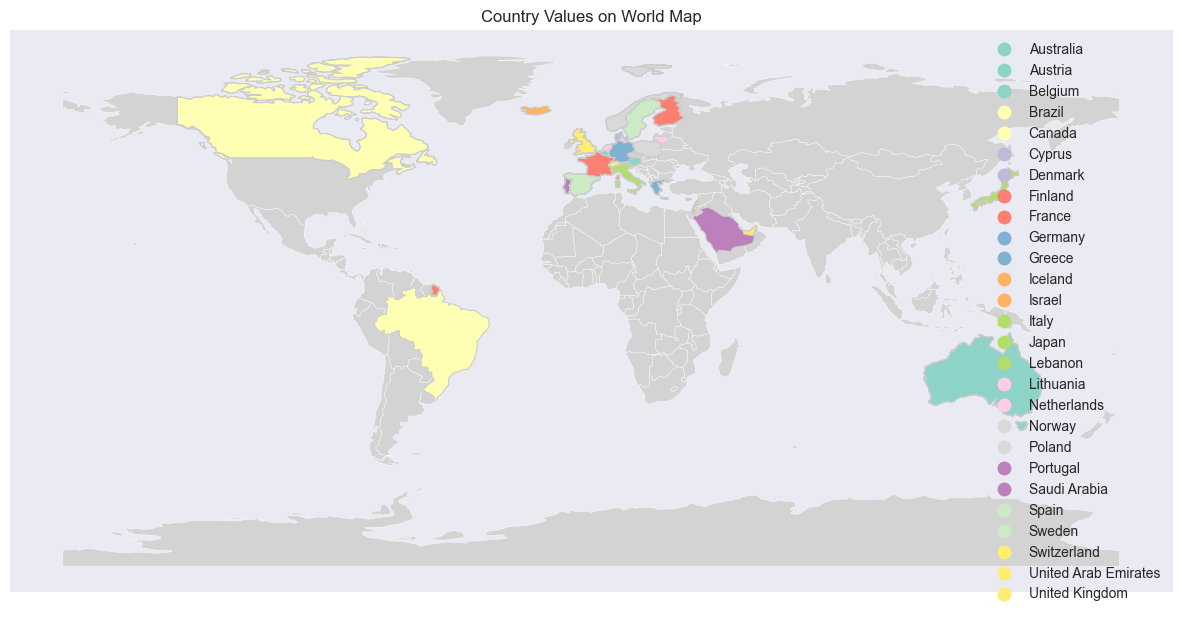

In [795]:
import geopandas as gpd

def plot_country_values_on_world_map(df):
    # Read the world shapefile
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Merge the world shapefile with the input dataframe
    merged = world.merge(df, left_on='name', right_on='Country', how='left')

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(15, 10))

    # Plot all countries in light gray
    world.plot(ax=ax, color='lightgray')

    # Plot the countries present in the data
    merged.plot(column='Country', cmap='Set3', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Set the title of the plot
    ax.set_title('Country Values on World Map')

    # Remove the axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Show the plot
    plt.show()

plot_country_values_on_world_map(grouped_df)

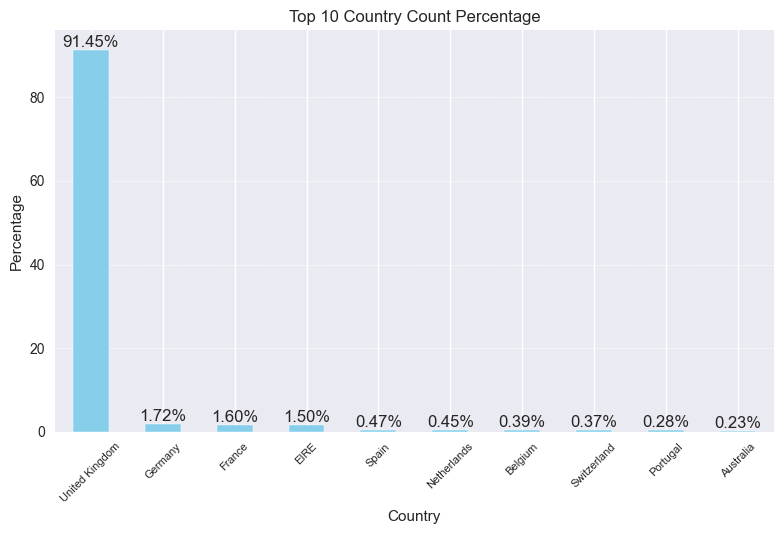

In [796]:
def plot_country_percentage(df, top_n=10):
    # Calculate count and percentage of each country
    country_counts = df['Country'].value_counts()
    country_percentages = (country_counts / len(df)) * 100

    # Select the top N countries based on count
    top_countries = country_percentages.nlargest(top_n)

    # Create the plot
    fig, ax = plt.subplots()
    bars = top_countries.plot(kind='bar', ax=ax, color='skyblue')

    # Set plot title and axis labels
    ax.set_title(f'Top {top_n} Country Count Percentage')
    ax.set_xlabel('Country')
    ax.set_ylabel('Percentage')

    # Customize tick labels and grid lines
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)
    ax.grid(axis='y', linestyle='--', linewidth=0.5)

    # Add data labels to the bars
    for i, value in enumerate(top_countries):
        ax.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    
plot_country_percentage(df)

Customers purschasing from UK are highest in numbers follwed by 
1. Germany 
2. France 
3. EIRE 

Total Price 

In [797]:
# Multiply 'Quantity' and 'UnitPrice' to calculate the total price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [798]:
df['TotalPrice']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalPrice, Length: 525454, dtype: float64

#### Invoice_NO

In [799]:
df['InvoiceNo']

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 525454, dtype: object

In [800]:
# Group by 'customer ID' and calculate the sum of 'quantity'
grouped_df = df.groupby('InvoiceNo').agg({'TotalPrice': 'sum', 'CustomerID': 'first'})

In [801]:
grouped_df
grouped_df = grouped_df.reset_index()
grouped_df

InvoiceNo  TotalPrice  CustomerID
0        536365      139.12       17850
1        536366       22.20       17850
2        536367      278.73       13047
3        536368       70.05       13047
4        536369       17.85       13047
...         ...         ...         ...
20123    581584      140.64       13777
20124    581585      329.05       15804
20125    581586      339.20       13113
20126    581587      249.45       12680
20127   A563185    11062.06       15287

[20128 rows x 3 columns]

G- CustomerID and TotalPrice

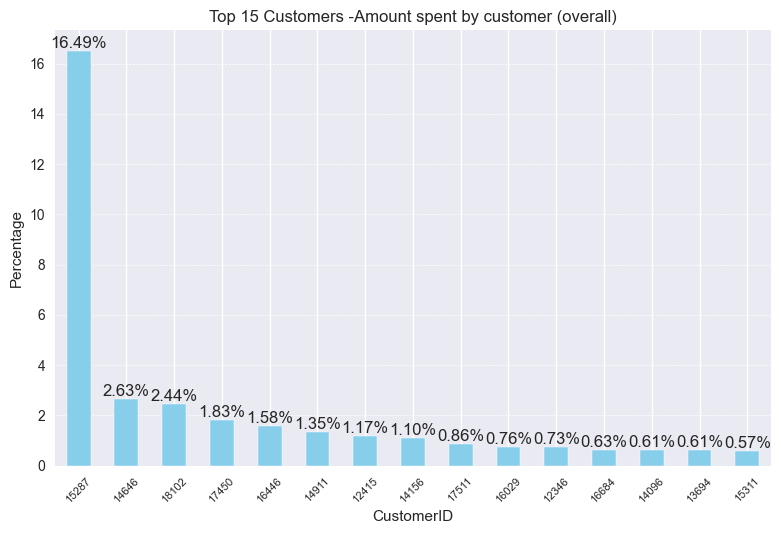

In [802]:
def plot_total_price_percentage(df, top_n=15):
    # Calculate the total sum of 'TotalPrice'
    total_sum = df['TotalPrice'].sum()

    # Calculate the percentage of 'TotalPrice' for each 'CustomerID'
    percentage = (df.groupby('CustomerID')['TotalPrice'].sum() / total_sum) * 100

    # Select the top N customers based on 'TotalPrice' percentage
    top_customers = percentage.nlargest(top_n)

    # Create the plot
    fig, ax = plt.subplots()
    bars = top_customers.plot(kind='bar', ax=ax, color='skyblue')

    # Set plot title and axis labels
    ax.set_title(f'Top {top_n} Customers -Amount spent by customer (overall)')
    ax.set_xlabel('CustomerID')
    ax.set_ylabel('Percentage')

    # Customize tick labels and grid lines
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)
    ax.grid(axis='y', linestyle='--', linewidth=0.5)

    # Add data labels to the bars
    for i, value in enumerate(top_customers):
        ax.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    
plot_total_price_percentage(grouped_df)

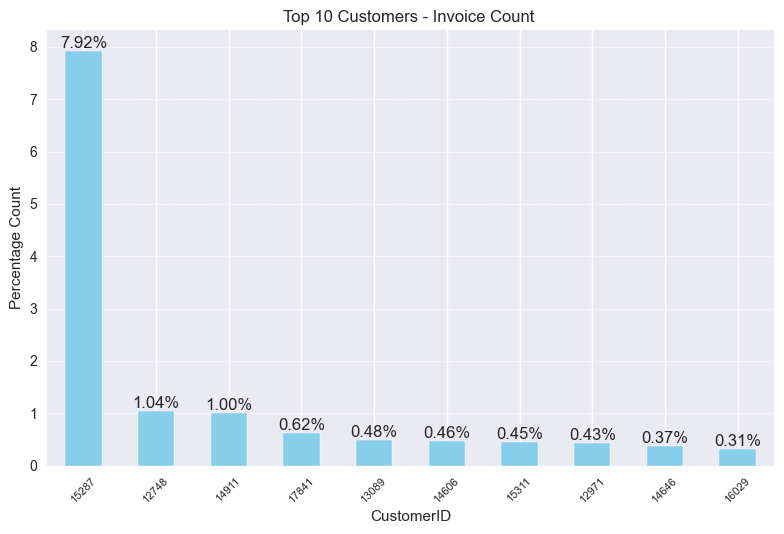

In [803]:
def calculate_invoice_percentage(df):
    # Group by 'CustomerID' and count the occurrences of each 'Invoice'
    invoice_counts = df.groupby('CustomerID')['InvoiceNo'].count()

    # Calculate the total count of 'Invoice' across all customers
    total_count = invoice_counts.sum()

    # Calculate the percentage of data count for each 'CustomerID'
    percentage = (invoice_counts / total_count) * 100

    # Sort the percentages in descending order
    percentage = percentage.sort_values(ascending=False)

    return percentage


def plot_invoice_percentage(df, top_n=10):
    # Calculate the percentage of data count for each 'CustomerID'
    invoice_percentage = calculate_invoice_percentage(df)

    # Select the top N customers based on invoice count percentage
    top_customers = invoice_percentage.head(top_n)

    # Create the plot
    fig, ax = plt.subplots()
    bars = top_customers.plot(kind='bar', ax=ax, color='skyblue')

    # Set plot title and axis labels
    ax.set_title(f'Top {top_n} Customers - Invoice Count ')
    ax.set_xlabel('CustomerID')
    ax.set_ylabel('Percentage Count')

    # Customize tick labels and grid lines
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)
    ax.grid(axis='y', linestyle='--', linewidth=0.5)

    # Add data labels to the bars
    for i, value in enumerate(top_customers):
        ax.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame
plot_invoice_percentage(grouped_df, top_n=10)

Per customer mutiple transactions invoice can be observed , among which custome "15287" has the highest transaction count and also spending the most amount

In [804]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0  2010-12-01 08:26:00       2.55       17850  United Kingdom       15.30  
1  2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  
2  2010-12-01 08:26:00       2.75       17850  United Kingdom       22.00  
3  2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  
4  2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34

Date Columns

In [805]:
df['InvoiceDate']

0         2010-12-01 08:26:00
1         2010-12-01 08:26:00
2         2010-12-01 08:26:00
3         2010-12-01 08:26:00
4         2010-12-01 08:26:00
                 ...         
541904    2011-12-09 12:50:00
541905    2011-12-09 12:50:00
541906    2011-12-09 12:50:00
541907    2011-12-09 12:50:00
541908    2011-12-09 12:50:00
Name: InvoiceDate, Length: 525454, dtype: object

In [806]:
def separate_date_time(df, column_label):
    # Extract date and time from the given column
    df['Invoice_Date'] = pd.to_datetime(df[column_label]).dt.date
    df['Incoice_Time'] = pd.to_datetime(df[column_label]).dt.time

    # Drop the original column
    df.drop(column_label, axis=1, inplace=True)

    return df

separate_date_time(df,'InvoiceDate')


InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

        UnitPrice  CustomerID         Country  TotalPrice Invoice_Date  \
0            2.55       17850  United Kingdom       15.30   2010-12-01   
1            3.39       17850  United Kingdom       20.34   2010-12-01   
2            2.75       17850  United Kingdom       22.00   2010-12-01   
3            3.39       17850  United Kingdom       20.34   2010-12-01   
4            3.39       17850  United Kingdom       20.34   2010-12-01   
...           ...         ...             ...         ...          ...   
541904       0.85       12680          France       10.20   2011-12-09   
541905       2.10       12680          France       12.60   2011-12-09   
541906       4.15       12680          France       16.60   2011-12-09   
541907       4.15       12680          France       16.60   2011-12-09   
541908       4.95       12680          France       14.85   2011-12-09   

       Incoice_Time  
0          08:26:00  
1          08:26:00  
2          08:26:00  
3          08:26:00  
4          08:26:00  
...             ...  
541904     12:50:00  
541905     12:50:00  
541906     12:50:00  
541907     12:50:00  
541908     12:50:00  

[525454 rows x 10 columns]

<Figure size 1000x600 with 0 Axes>

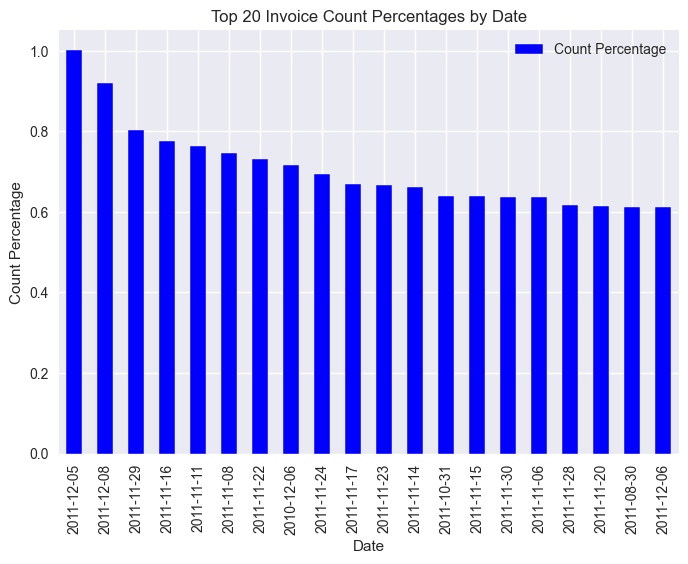

In [807]:
def plot_invoice_count_percentage(df):
    # Convert "Invoice Date" column to datetime type
    df['Invoice_Date'] = pd.to_datetime(df['Invoice_Date'])

    # Group by date and calculate count and percentage
    group_data = df.groupby(df['Invoice_Date'].dt.date)['InvoiceNo'].count()
    group_data_percentage = group_data / group_data.sum() * 100

    # Sort the count percentages in descending order and convert to DataFrame
    sorted_data = group_data_percentage.sort_values(ascending=False).reset_index()
    sorted_data.columns = ['Date', 'Count Percentage']

    # Get the top 20 count percentages
    top_20_percentage = sorted_data.nlargest(20, 'Count Percentage')

    # Plot the count percentage
    plt.figure(figsize=(10, 6))
    top_20_percentage.plot(x='Date', y='Count Percentage', kind='bar', color='blue')

    # Set plot title and labels
    plt.title('Top 20 Invoice Count Percentages by Date')
    plt.xlabel('Date')
    plt.ylabel('Count Percentage')

    # Show the plot
    plt.show()

    # Return the sorted data (including complete data) as a DataFrame
    return sorted_data

group_data_percentage=plot_invoice_count_percentage(df)

In [808]:
group_data_percentage

Date  Count Percentage
0    2011-12-05          1.001229
1    2011-12-08          0.920347
2    2011-11-29          0.802734
3    2011-11-16          0.777042
4    2011-11-11          0.764672
..          ...               ...
300  2011-08-07          0.099343
301  2010-12-19          0.094775
302  2011-05-01          0.084879
303  2010-12-22          0.054239
304  2011-02-06          0.051955

[305 rows x 2 columns]

In [809]:
import pandas as pd



In [810]:

def extract_date_components(df):
    df['Date'] = pd.to_datetime(df['Date'])  # Convert "Date" column to datetime
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['Year'] = df['Date'].dt.year
    return df
group_data_percentage=extract_date_components(group_data_percentage)
group_data_percentage

Date  Count Percentage  Month  Day  Year
0   2011-12-05          1.001229     12    5  2011
1   2011-12-08          0.920347     12    8  2011
2   2011-11-29          0.802734     11   29  2011
3   2011-11-16          0.777042     11   16  2011
4   2011-11-11          0.764672     11   11  2011
..         ...               ...    ...  ...   ...
300 2011-08-07          0.099343      8    7  2011
301 2010-12-19          0.094775     12   19  2010
302 2011-05-01          0.084879      5    1  2011
303 2010-12-22          0.054239     12   22  2010
304 2011-02-06          0.051955      2    6  2011

[305 rows x 5 columns]

In [811]:

latest_date = group_data_percentage['Date'].max()

print("Latest date:", latest_date)

Latest date: 2011-12-09 00:00:00


In [812]:
earliest_date = group_data_percentage['Date'].min()

print("Earliest date:", earliest_date)

Earliest date: 2010-12-01 00:00:00


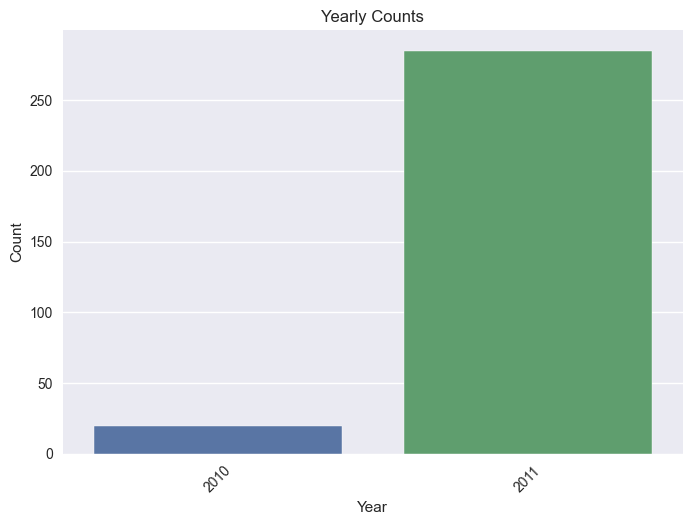

In [813]:
def plot_year_counts(df, year_column):
    # Group the DataFrame by the year column and count the occurrences of each year
    year_counts = df[year_column].value_counts().sort_index()

    # Create a count plot using seaborn
    sns.countplot(x=year_column, data=df)

    # Set the labels and title
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.title("Yearly Counts")

    # Rotate the x-axis labels for better readability if needed
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

plot_year_counts(group_data_percentage,'Year')


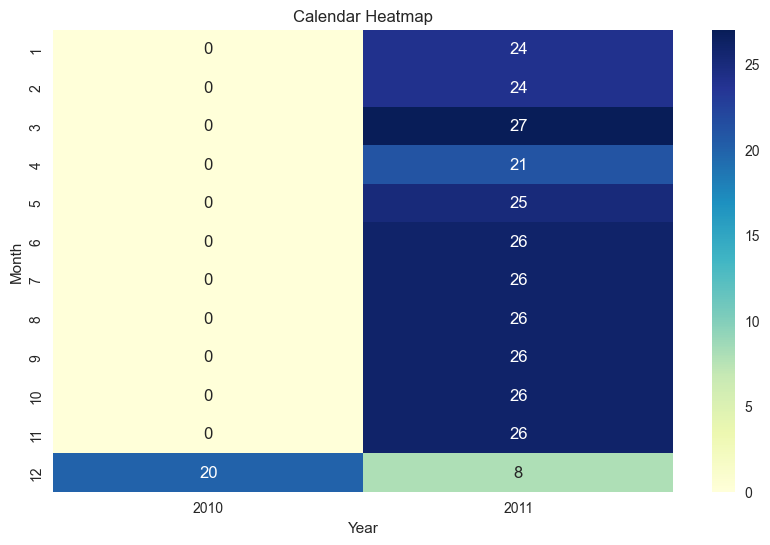

In [814]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_calendar_heatmap(df, date_column):
    # Convert the date column to datetime type if it's not already
    df[date_column] = pd.to_datetime(df[date_column])

    # Extract the year and month from the dates
    df['Year'] = df[date_column].dt.year
    df['Month'] = df[date_column].dt.month

    # Group the DataFrame by year and month and count the occurrences of each date
    calendar_data = df.groupby(['Year', 'Month']).size().reset_index(name='Count')

    # Pivot the data to create a calendar grid
    calendar_grid = calendar_data.pivot_table(values='Count', index='Month', columns='Year', fill_value=0)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the calendar heatmap using seaborn
    sns.heatmap(calendar_grid, annot=True, fmt="d", cmap='YlGnBu', cbar=True, ax=ax)

    # Set the labels and title
    plt.xlabel("Year")
    plt.ylabel("Month")
    plt.title("Calendar Heatmap")

    # Show the plot
    plt.show()


    
plot_calendar_heatmap(group_data_percentage,'Date')

1. Data of December 2010 of 20 days | Data of December 2011 is of just 8 days 
2. Considering Customer purchase behaviours does not vary much 

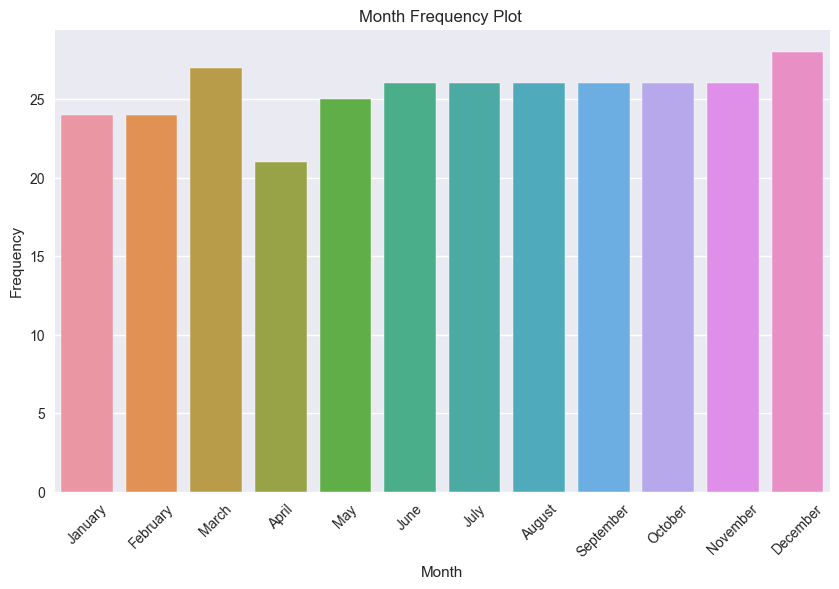

In [815]:
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

def plot_month_frecency(df):
    # Map month numbers to month names
    month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
                   5: 'May', 6: 'June', 7: 'July', 8: 'August',
                   9: 'September', 10: 'October', 11: 'November', 12: 'December'}
    
    # Replace month numbers with month names in a new column 'MonthLabel'
    df['MonthLabel'] = df['Month'].map(month_names)
    

    
    # Define the order of the months
    month_order = list(calendar.month_name)[1:]
    
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='MonthLabel', order=month_order)
    plt.xlabel('Month')
    plt.ylabel('Frequency')
    plt.title('Month Frequency Plot ')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()


plot_month_frecency(group_data_percentage)

1. Highest frequncy of transaction can be observed during the end of the year
2. April has the least frequency 

### Customer Segmentation:
 - Customer segmentation is similarly the process of dividing an organization’s customer bases into different sections or segments based on various customer attributes. The process of customer segmentation is based on the premise of finding differences among the customers’ behavior and patterns.

The major objectives and benefits behind the motivation for customer segmentation are:

 - **Higher Revenue:** This is the most obvious requirement of any customer segmentation project.
 - **Customer Understanding:** One of the mostly widely accepted business paradigms is “know your customer” and a segmentation of the customer base allows for a perfect dissection of this paradigm.
 - **Target Marketing:** The most visible reason for customer segmentation is the ability to focus marketing efforts effectively and efficiently. If a firm knows the different segments of its customer base, it can devise better marketing campaigns which are tailor made for the segment. A good segmentation model allows for better understanding of customer requirements and hence increases the chances of the success of any marketing campaign developed by the organization.
 - **Optimal Product Placement:** A good customer segmentation strategy can also help the firm with developing or offering new products, or a bundle of products together as a combined offering.
 - **Finding Latent Customer Segments:** Finding out which segment of customers it might be missing to identifying untapped customer segments by focused on marketing campaigns or new business development



**Clustering:**

 - The most obvious method to perform customer segmentation is using unsupervised Machine Learning methods like clustering. The method is as simple as collecting as much data about the customers as possible in the form of features or attributes and then finding out the different clusters that can be obtained from that data. Finally, we can find traits of customer segments by analyzing the characteristics of the clusters.

**Exploratory Data Analysis:**

 - Using exploratory data analysis is another way of finding out customer segments. This is usually done by analysts who have a good knowledge about the domain relevant to both products and customers. It can be done flexibly to include the top decision points in an analysis.

**RFM Model for Customer Value:**
 - Since our dataset is limited to the sales records, and didn´t include anothers information about our customers, we will use a RFM,*Recency, Frequency and Monetary Value, based model of customer value for finding our customer segments. The RFM model will take the transactions of a customer and calculate three important informational attributes about each customer:

**Recency:** The value of how recently a customer purchased at the establishment
**Frequency:** How frequent the customer’s transactions are at the establishment
**Monetary value:** The dollar (or pounds in our case) value of all the transactions that the customer made at the establishment

### Customer segmentation analysis

**Customer segmentation analysis** is a process of dividing customers into groups based on their common characteristics and behaviors, so that businesses can better understand and target their customers. Some of the things that can be done in customer segmentation analysis are:

**Demographic segmentation:** Segmenting customers based on age, gender, income, education, occupation, etc.

**Geographic segmentation:** Segmenting customers based on their geographic location, such as country, city, zip code, etc.

**Psychographic segmentation:** Segmenting customers based on their personality traits, values, interests, lifestyle, etc.

**Behavioral segmentation:** Segmenting customers based on their buying behavior, such as purchase frequency, purchase amount, brand loyalty, etc.

**RFM analysis:** A combination of behavioral segmentation, which stands for Recency, Frequency, and Monetary value. It measures the recentness of customer purchases, how often they make purchases, and how much they spend.

***

**Recency:** The value of how recently a customer purchased at the establishment
**Frequency:** How frequent the customer’s transactions are at the establishment
**Monetary value:** The dollar (or pounds in our case) value of all the transactions that the customer made at the establishment

***

**Customer lifetime value analysis:** Analyzing the total value a customer brings to the business over their lifetime, including all purchases and referrals.

**Churn analysis:** Identifying customers who are at risk of leaving the business and taking actions to prevent them from doing so.

**Persona development:** Creating fictional personas that represent typical customers in different segments, to better understand their needs, motivations, and behaviors.

**Customized marketing campaigns:** Creating targeted marketing campaigns for each customer segment, based on their unique characteristics and behaviors.

**Customer experience improvement:** Improving the customer experience for each segment, by tailoring products, services, and interactions to their specific needs and preferences.







### RFM analysis

**RFM analysis** is a customer segmentation technique that stands for Recency, Frequency, and Monetary Value. It helps to identify customers who are most valuable to a business by analyzing their past purchasing behavior.

The steps to perform RFM analysis are as follows:

**Recency:** Determine the most recent purchase date of each customer. This could be the date of the last order placed, or the date of the last website visit, or the date of the last interaction with the company. Assign a score based on recency, with the most recent customers receiving the highest score.

**Frequency:** Determine the number of purchases made by each customer within a specified time period (usually one year). Assign a score based on frequency, with the most frequent customers receiving the highest score.

**Monetary Value:** Determine the total amount of money spent by each customer within the specified time period. Assign a score based on monetary value, with the highest spending customers receiving the highest score.

**Combine the scores for each customer:** Once you have assigned scores for each of the three factors, combine them into an overall RFM score. This can be done in a number of ways, such as adding up the three scores or averaging them.

**Segment the customers:** Finally, group the customers based on their RFM scores. This can be done in a number of ways, such as by dividing them into quartiles or quintiles, or by using clustering techniques.

RFM analysis can provide valuable insights into customer behavior and help businesses to identify their most valuable customers, as well as opportunities for targeted marketing and retention strategies.







# Recency

 - Determine the most recent purchase date of each customer. This could be the date of the last order placed, or the date of the last website visit, or the date of the last interaction with the company. Assign a score based on recency, with the most recent customers receiving the highest score.

In [816]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

   UnitPrice  CustomerID         Country  TotalPrice Invoice_Date Incoice_Time  
0       2.55       17850  United Kingdom       15.30   2010-12-01     08:26:00  
1       3.39       17850  United Kingdom       20.34   2010-12-01     08:26:00  
2       2.75       17850  United Kingdom       22.00   2010-12-01     08:26:00  
3       3.39       17850  United Kingdom       20.34   2010-12-01     08:26:00  
4       3.39       17850  United Kingdom       20.34   2010-12-01     08:26:00

In [817]:
def extract_date_month_year(df, date_column):
    # Convert the date column to datetime type if it's not already
    df[date_column] = pd.to_datetime(df[date_column])

    # Extract the date, month, and year from the column
    df['Date'] = df[date_column].dt.date
    df['Month'] = df[date_column].dt.month.map(lambda x: calendar.month_abbr[x])
    df['Year'] = df[date_column].dt.year

    return df
df=extract_date_month_year(df,'Invoice_Date')

In [818]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

   UnitPrice  CustomerID         Country  TotalPrice Invoice_Date  \
0       2.55       17850  United Kingdom       15.30   2010-12-01   
1       3.39       17850  United Kingdom       20.34   2010-12-01   
2       2.75       17850  United Kingdom       22.00   2010-12-01   
3       3.39       17850  United Kingdom       20.34   2010-12-01   
4       3.39       17850  United Kingdom       20.34   2010-12-01   

  Incoice_Time        Date Month  Year  
0     08:26:00  2010-12-01   Dec  2010  
1     08:26:00  2010-12-01   Dec  2010  
2     08:26:00  2010-12-01   Dec  2010  
3     08:26:00  2010-12-01   Dec  2010  
4     08:26:00  2010-12-01   Dec  2010

In [819]:
def calculate_recency(df, date_column):
    # Convert the date column to datetime type if it's not already
    df[date_column] = pd.to_datetime(df[date_column])

    # Calculate the maximum date in the column
    max_date = df[date_column].max()

    # Calculate the recency by subtracting the maximum date from each date in the column
    df['recency'] = (max_date - df[date_column]).dt.days

    return df
RC_df=calculate_recency(df,'Invoice_Date')

In [820]:
RC_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

   UnitPrice  CustomerID         Country  TotalPrice Invoice_Date  \
0       2.55       17850  United Kingdom       15.30   2010-12-01   
1       3.39       17850  United Kingdom       20.34   2010-12-01   
2       2.75       17850  United Kingdom       22.00   2010-12-01   
3       3.39       17850  United Kingdom       20.34   2010-12-01   
4       3.39       17850  United Kingdom       20.34   2010-12-01   

  Incoice_Time        Date Month  Year  recency  
0     08:26:00  2010-12-01   Dec  2010      373  
1     08:26:00  2010-12-01   Dec  2010      373  
2     08:26:00  2010-12-01   Dec  2010      373  
3     08:26:00  2010-12-01   Dec  2010      373  
4     08:26:00  2010-12-01   Dec  2010      373

In [821]:
RC_df['recency']

0         373
1         373
2         373
3         373
4         373
         ... 
541904      0
541905      0
541906      0
541907      0
541908      0
Name: recency, Length: 525454, dtype: int64

Rmf_Table

In [822]:
rfm_table =  RC_df.groupby('CustomerID')['recency'].min().reset_index()

rfm_table

CustomerID  recency
0          12346      325
1          12347        2
2          12348       75
3          12349       18
4          12350      310
...          ...      ...
4334       18280      277
4335       18281      180
4336       18282        7
4337       18283        3
4338       18287       42

[4339 rows x 2 columns]

## Frequency


**Frequency:** Determine the number of purchases made by each customer within a specified time period 

In [823]:
count_table=df.groupby('CustomerID').count()['InvoiceNo'].to_frame().reset_index()
count_table.rename(columns={'InvoiceNo': 'frequency'}, inplace=True)
count_table

CustomerID  frequency
0          12346          1
1          12347        182
2          12348         31
3          12349         73
4          12350         17
...          ...        ...
4334       18280         10
4335       18281          7
4336       18282         12
4337       18283        721
4338       18287         70

[4339 rows x 2 columns]

In [824]:
# Merge the two tables on 'CustomerID'
rfm_table = rfm_table.merge(count_table, on='CustomerID')


# Print the resulting table
print(rfm_table)

      CustomerID  recency  frequency
0          12346      325          1
1          12347        2        182
2          12348       75         31
3          12349       18         73
4          12350      310         17
...          ...      ...        ...
4334       18280      277         10
4335       18281      180          7
4336       18282        7         12
4337       18283        3        721
4338       18287       42         70

[4339 rows x 3 columns]


In [825]:
rfm_table

CustomerID  recency  frequency
0          12346      325          1
1          12347        2        182
2          12348       75         31
3          12349       18         73
4          12350      310         17
...          ...      ...        ...
4334       18280      277         10
4335       18281      180          7
4336       18282        7         12
4337       18283        3        721
4338       18287       42         70

[4339 rows x 3 columns]

### monentary

 - **Monetary Value:** Determine the total amount of money spent by each customer within the specified time period.

In [826]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'CustomerID', 'Country', 'TotalPrice', 'Invoice_Date', 'Incoice_Time',
       'Date', 'Month', 'Year', 'recency'],
      dtype='object')

In [827]:
df.dtypes

InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
UnitPrice              float64
CustomerID               int64
Country                 object
TotalPrice             float64
Invoice_Date    datetime64[ns]
Incoice_Time            object
Date                    object
Month                   object
Year                     int32
recency                  int64
dtype: object

In [828]:
monetary = df.groupby('CustomerID')['TotalPrice'].sum().rename('monetary').reset_index()
monetary.rename(columns={'TotalPrice': 'monetary'}, inplace=True)

In [829]:
monetary

CustomerID  monetary
0          12346  77183.60
1          12347   4310.00
2          12348   1797.24
3          12349   1757.55
4          12350    334.40
...          ...       ...
4334       18280    180.60
4335       18281     80.82
4336       18282    178.05
4337       18283   2045.53
4338       18287   1837.28

[4339 rows x 2 columns]

In [830]:
rfm_table = rfm_table.merge(monetary, on='CustomerID')

In [831]:
rfm_table.describe()

CustomerID      recency      frequency      monetary
count   4339.000000  4339.000000    4339.000000  4.339000e+03
mean   15299.936852    92.036414     121.100254  2.452664e+03
std     1721.889758   100.011867    2026.391736  2.809307e+04
min    12346.000000     0.000000       1.000000  0.000000e+00
25%    13812.500000    17.000000      17.000000  3.064550e+02
50%    15299.000000    50.000000      41.000000  6.685800e+02
75%    16778.500000   141.500000      98.000000  1.660890e+03
max    18287.000000   373.000000  132742.000000  1.755389e+06

In [832]:
rfm_table.set_index('CustomerID',inplace=True)

In [833]:
rfm_table

recency  frequency  monetary
CustomerID                              
12346           325          1  77183.60
12347             2        182   4310.00
12348            75         31   1797.24
12349            18         73   1757.55
12350           310         17    334.40
...             ...        ...       ...
18280           277         10    180.60
18281           180          7     80.82
18282             7         12    178.05
18283             3        721   2045.53
18287            42         70   1837.28

[4339 rows x 3 columns]

# RFM Analysis

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique used to analyze customer behavior based on three key factors: Recency, Frequency, and Monetary Value.

## Recency
Recency determines the most recent purchase date of each customer. A high recency value indicates that the customer is coming back to make a purchase after a longer period of time. Generally, a high recency value is not desirable as it suggests less customer engagement and potentially lower customer loyalty.

## Frequency
Frequency refers to the number of purchases made by each customer within a specified time period. A high frequency value indicates that the customer has made a larger number of purchases. High frequency is generally considered a positive indicator as it signifies active customer engagement and potential customer loyalty.

## Monetary
Monetary represents the monetary value of purchases made by each customer. A high monetary value indicates that the customer is spending a larger amount of money on purchases. For businesses, a high monetary value is generally desirable as it implies higher revenue generation and potentially higher customer lifetime value.

RFM analysis helps businesses identify and target different customer segments based on their buying patterns, allowing for more personalized marketing strategies and better customer relationship management.


In [834]:
# now make pair like where
# recency is low and frequency and monetary is high -- best customer
# recency is high and frequency and monetary is low - not a good cusotmer

In [835]:
def create_rfm_labels(df, recency_col, frequency_col, monetary_col):
    # Create labels for R segments
    r_labels = range(4, 0, -1)
    r_quartiles = pd.qcut(df[recency_col], q=4, labels=r_labels)
    df['R_Labels'] = r_quartiles.astype(str)

    # Create labels for F segments
    f_labels = range(1, 5)
    f_quartiles = pd.qcut(df[frequency_col], q=4, labels=f_labels)
    df['F_Labels'] = f_quartiles.astype(str)

    # Create labels for M segments
    m_labels = range(1, 5)
    m_quartiles = pd.qcut(df[monetary_col], q=4, labels=m_labels)
    df['M_Labels'] = m_quartiles.astype(str)

    return df

rmf_table=create_rfm_labels(rfm_table,'recency','frequency','monetary')


# Access the quartile labels
r_quartiles = rmf_table['R_Labels']
f_quartiles = rmf_table['F_Labels']
m_quartiles = rmf_table['M_Labels']

In [836]:
rmf_table

recency  frequency  monetary R_Labels F_Labels M_Labels
CustomerID                                                         
12346           325          1  77183.60        1        1        4
12347             2        182   4310.00        4        4        4
12348            75         31   1797.24        2        2        4
12349            18         73   1757.55        3        3        4
12350           310         17    334.40        1        1        2
...             ...        ...       ...      ...      ...      ...
18280           277         10    180.60        1        1        1
18281           180          7     80.82        1        1        1
18282             7         12    178.05        4        1        1
18283             3        721   2045.53        4        4        4
18287            42         70   1837.28        3        3        4

[4339 rows x 6 columns]

#### Recency Ranges:
Recency ranges from 1 to 4, representing different customer behaviors based on their time since the most recent purchase:
- R1: Customers who come back after a long time (worst)
- R2: Customers who have a moderate recency
- R3: Customers who come back somewhat frequently
- R4: Customers who come back in regular intervals of time (best)

***

#### Frequency Ranges:
Frequency ranges from 1 to 4, indicating the number of purchases made by each customer:
- F1: Customers with the lowest frequency of purchases (worst)
- F2: Customers with a moderate frequency
- F3: Customers with a relatively higher frequency
- F4: Customers with the highest number of purchases (best)

In [837]:
# Add R , F  and M segments to the RFM table

#assign - Returns a new object with all original columns in addition to new ones. Existing columns that are re-assigned will be overwritten.


In [838]:
rfm_table

recency  frequency  monetary R_Labels F_Labels M_Labels
CustomerID                                                         
12346           325          1  77183.60        1        1        4
12347             2        182   4310.00        4        4        4
12348            75         31   1797.24        2        2        4
12349            18         73   1757.55        3        3        4
12350           310         17    334.40        1        1        2
...             ...        ...       ...      ...      ...      ...
18280           277         10    180.60        1        1        1
18281           180          7     80.82        1        1        1
18282             7         12    178.05        4        1        1
18283             3        721   2045.53        4        4        4
18287            42         70   1837.28        3        3        4

[4339 rows x 6 columns]

In [839]:
def calculate_rfm_score(df, r_col, f_col, m_col):
    # Combine RFM segments to create RFM score
    df['RFM_Score'] = df[r_col].astype(str) + df[f_col].astype(str) + df[m_col].astype(str)
    
    return df


rfm_table=calculate_rfm_score(rfm_table,'R_Labels','F_Labels','M_Labels')

In [840]:
rfm_table

recency  frequency  monetary R_Labels F_Labels M_Labels RFM_Score
CustomerID                                                                   
12346           325          1  77183.60        1        1        4       114
12347             2        182   4310.00        4        4        4       444
12348            75         31   1797.24        2        2        4       224
12349            18         73   1757.55        3        3        4       334
12350           310         17    334.40        1        1        2       112
...             ...        ...       ...      ...      ...      ...       ...
18280           277         10    180.60        1        1        1       111
18281           180          7     80.82        1        1        1       111
18282             7         12    178.05        4        1        1       411
18283             3        721   2045.53        4        4        4       444
18287            42         70   1837.28        3        3        4       334

[4339 rows x 7 columns]

In [841]:
rfm_table['RFM_Score'].unique()

array(['114', '444', '224', '334', '112', '111', '133', '344', '423',
       '244', '222', '433', '122', '411', '233', '323', '412', '223',
       '434', '144', '322', '332', '333', '312', '134', '123', '124',
       '311', '212', '422', '214', '234', '221', '213', '121', '342',
       '424', '211', '313', '243', '432', '242', '113', '414', '324',
       '343', '231', '143', '132', '443', '413', '321', '421', '442',
       '131', '232', '331', '431', '314', '142', '441'], dtype=object)

# Making Pair

- Recency segments starting with 4 represent the best customers who visit on a regular basis.
- Recency segments starting with 1 represent the lost customers who visited a long time ago.


-------

- Frequency segments starting with 4 represent the best customers who make a high number of purchases within a specified time period.
- Frequency segments starting with 1 represent the customers who make very few purchases.

------

- Monetary segments starting with 4 represent the customers who spend a significant amount of money.
- Monetary segments starting with 1 represent the customers who spend a lesser amount of money.

--------

Customers with RFM score 444 are the most valuable customers who visit regularly, make a high number of purchases, and spend more.

Customers with RFM scores like 111 or 112 represent lost customers who visited a long time ago, make fewer purchases, and spend less.



In [842]:
def label_rmf_scores(df, rfm_score_col):
    df['Segment'] = 'Needs Attention'  # Set default segment label
    
    segment_mapping = {
        '444': 'Best Customers',
        '443': 'Best Customers',
        '434': 'Best Customers',
        '433': 'Best Customers',
        '334': 'Best Customers',
        '344': 'Best Customers',
        '412': 'Best Customers',
        '414': 'Best Customers',
        '424': 'Best Customers',
        '422': 'Best Customers',
        '324': 'Loyal Customers',
        '323': 'Loyal Customers',
        '322': 'Loyal Customers',
        '333': 'Loyal Customers',
        '334': 'Loyal Customers',
        '343': 'Loyal Customers',
        '232': 'Loyal Customers',
        '231': 'Loyal Customers',
        '222': 'Loyal Customers',
        '221': 'Loyal Customers',
        '112': 'Churned Customers',
        '111': 'Churned Customers',
        '113': 'Churned Customers',
        '114': 'Churned Customers',
        '124': 'Churned Customers',
        '123': 'Churned Customers',
        '133': 'Churned Customers',
        '134': 'Churned Customers',
        '214': 'Big Spenders but almost lost',
        '234': 'Big Spenders but almost lost',
        '144': 'Big Spenders but almost lost',
        '143': 'Big Spenders but almost lost',
        '244': 'Need to focus',
        '243': 'Need to focus',
        '233': 'Need to focus',
        '431': 'Promising Customers',
        '421': 'Promising Customers',
        '441': 'Promising Customers',
        '442': 'Promising Customers',
        '432': 'Promising Customers',
        '313': 'Promising Customers',
        '314': 'Promising Customers',
        '331': 'Regular Customers',
        '321': 'Regular Customers',
        '342': 'Regular Customers',
        '141': 'Regular Customers'
    }

    df['Segment'] = df[rfm_score_col].map(segment_mapping).fillna('Needs Attention')

    return df

rfm_table=label_rmf_scores(rfm_table,'RFM_Score')


In [843]:
rfm_table.head()

recency  frequency  monetary R_Labels F_Labels M_Labels RFM_Score  \
CustomerID                                                                      
12346           325          1  77183.60        1        1        4       114   
12347             2        182   4310.00        4        4        4       444   
12348            75         31   1797.24        2        2        4       224   
12349            18         73   1757.55        3        3        4       334   
12350           310         17    334.40        1        1        2       112   

                      Segment  
CustomerID                     
12346       Churned Customers  
12347          Best Customers  
12348         Needs Attention  
12349         Loyal Customers  
12350       Churned Customers

In [844]:
def summarize_segments(rfm_table):
    segment_counts = {
        'Best Customers': len(rfm_table[rfm_table['RFM_Score'] == '444']),
        'Loyal Customers': len(rfm_table[rfm_table['F_Labels'] == '4']),
        'Big Spenders': len(rfm_table[rfm_table['M_Labels'] == '4']),
        'Almost Lost': len(rfm_table[rfm_table['RFM_Score'] == '244']),
        'Lost Customers': len(rfm_table[rfm_table['RFM_Score'] == '144']),
        'Lost Cheap Customers': len(rfm_table[rfm_table['RFM_Score'] == '111'])
    }
    
    for segment, count in segment_counts.items():
        print(f'{segment}: {count}')

  
summarize_segments(rfm_table)

Best Customers: 443
Loyal Customers: 1081
Big Spenders: 1085
Almost Lost: 105
Lost Customers: 22
Lost Cheap Customers: 381


In [845]:
rmf_table

recency  frequency  monetary R_Labels F_Labels M_Labels RFM_Score  \
CustomerID                                                                      
12346           325          1  77183.60        1        1        4       114   
12347             2        182   4310.00        4        4        4       444   
12348            75         31   1797.24        2        2        4       224   
12349            18         73   1757.55        3        3        4       334   
12350           310         17    334.40        1        1        2       112   
...             ...        ...       ...      ...      ...      ...       ...   
18280           277         10    180.60        1        1        1       111   
18281           180          7     80.82        1        1        1       111   
18282             7         12    178.05        4        1        1       411   
18283             3        721   2045.53        4        4        4       444   
18287            42         70   1837.28        3        3        4       334   

                      Segment  
CustomerID                     
12346       Churned Customers  
12347          Best Customers  
12348         Needs Attention  
12349         Loyal Customers  
12350       Churned Customers  
...                       ...  
18280       Churned Customers  
18281       Churned Customers  
18282         Needs Attention  
18283          Best Customers  
18287         Loyal Customers  

[4339 rows x 8 columns]

In [846]:
rmf_table.reset_index()

CustomerID  recency  frequency  monetary R_Labels F_Labels M_Labels  \
0          12346      325          1  77183.60        1        1        4   
1          12347        2        182   4310.00        4        4        4   
2          12348       75         31   1797.24        2        2        4   
3          12349       18         73   1757.55        3        3        4   
4          12350      310         17    334.40        1        1        2   
...          ...      ...        ...       ...      ...      ...      ...   
4334       18280      277         10    180.60        1        1        1   
4335       18281      180          7     80.82        1        1        1   
4336       18282        7         12    178.05        4        1        1   
4337       18283        3        721   2045.53        4        4        4   
4338       18287       42         70   1837.28        3        3        4   

     RFM_Score            Segment  
0          114  Churned Customers  
1          444     Best Customers  
2          224    Needs Attention  
3          334    Loyal Customers  
4          112  Churned Customers  
...        ...                ...  
4334       111  Churned Customers  
4335       111  Churned Customers  
4336       411    Needs Attention  
4337       444     Best Customers  
4338       334    Loyal Customers  

[4339 rows x 9 columns]

#### Outlier 

In [847]:
columns_to_remove_outliers = ['recency', 'frequency', 'monetary']

Z Score 

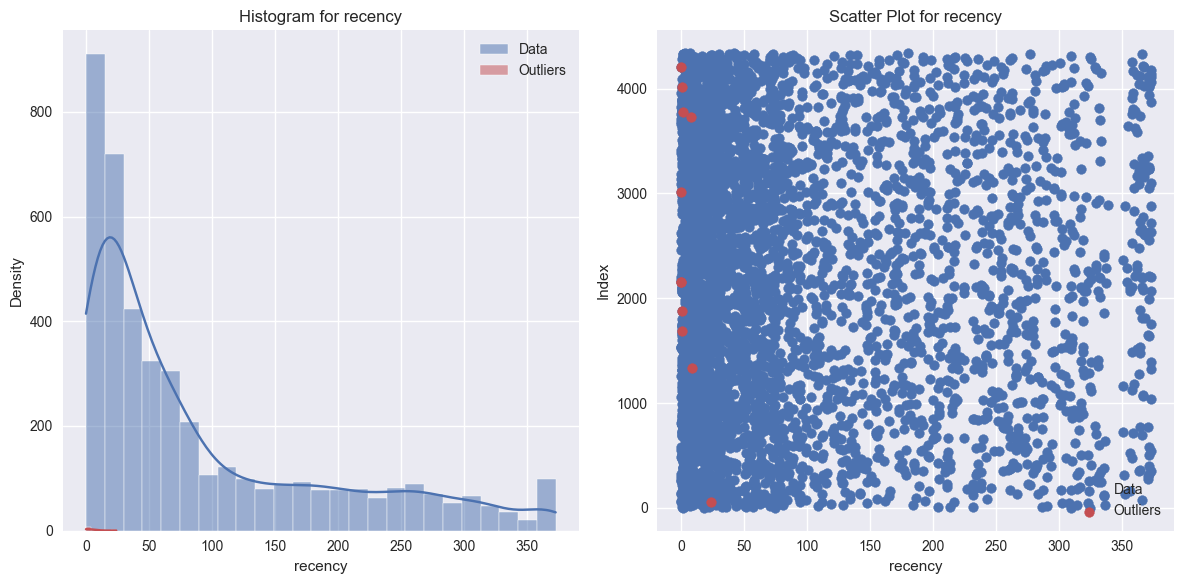

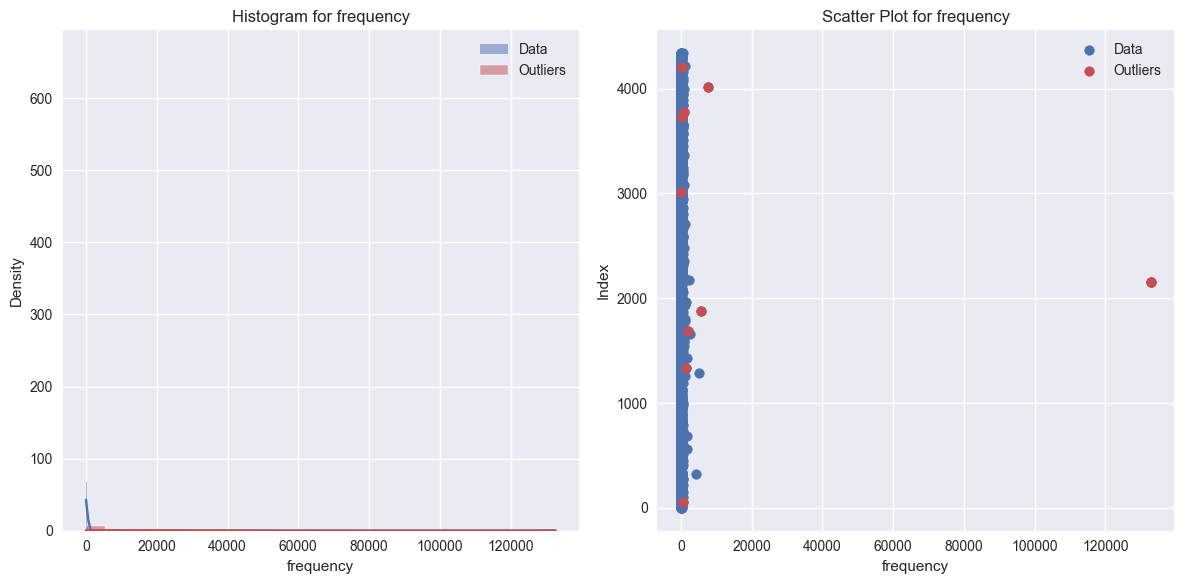

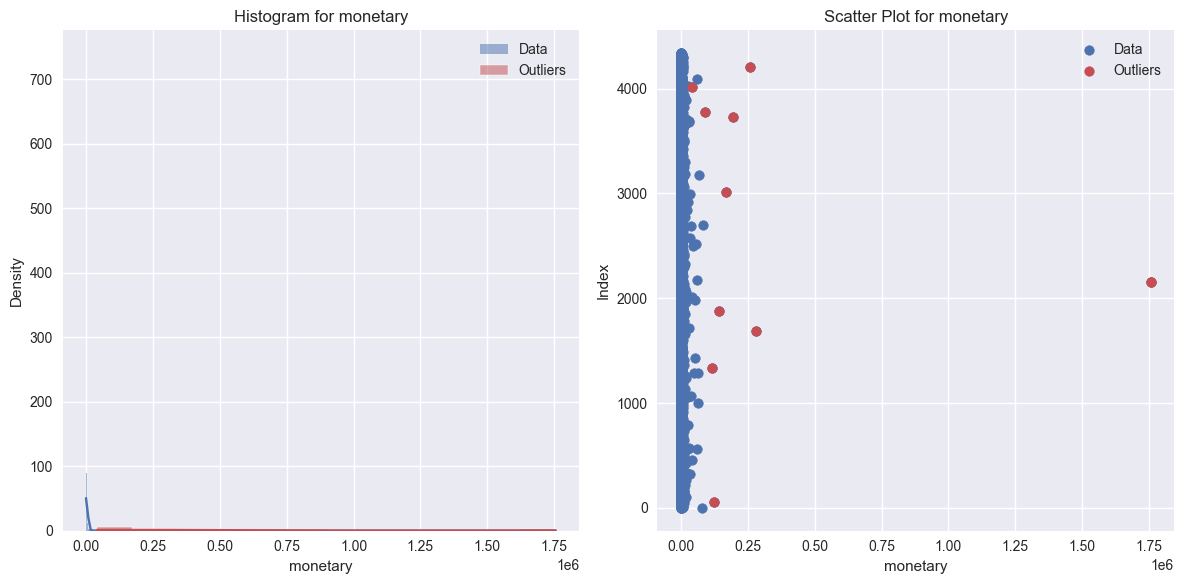

array([[  55,    2],
       [1334,    2],
       [1690,    2],
       [1880,    2],
       [2160,    1],
       [2160,    2],
       [3009,    2],
       [3729,    2],
       [3772,    2],
       [4011,    1],
       [4202,    2]], dtype=int64)

In [848]:

def detect_outliers_zscore(df, columns, threshold=3):
    # Select the specified columns from the DataFrame
    data = df[columns].values

    # Calculate the Z-scores for each column
    z_scores = np.abs((data - np.mean(data, axis=0)) / np.std(data, axis=0))

    # Identify outliers for each column
    outlier_mask = z_scores > threshold

    # Get the indices of the outliers
    outlier_indices = np.argwhere(outlier_mask)

    # Plot histogram and scatter plot side by side for each column
    for i, column in enumerate(columns):
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        # Histogram plot
        sns.histplot(data[:, i], kde=True, color='b', alpha=0.5, label='Data', ax=axs[0])
        sns.histplot(data[outlier_indices[:, 0], i], kde=True, color='r', alpha=0.5, label='Outliers', ax=axs[0])
        axs[0].set_xlabel(column)
        axs[0].set_ylabel('Density')
        axs[0].set_title(f'Histogram for {column}')
        axs[0].legend()

        # Scatter plot
        axs[1].scatter(data[:, i], range(len(data)), color='b', label='Data')
        axs[1].scatter(data[outlier_indices[:, 0], i], outlier_indices[:, 0], color='r', label='Outliers')
        axs[1].set_xlabel(column)
        axs[1].set_ylabel('Index')
        axs[1].set_title(f'Scatter Plot for {column}')
        axs[1].legend()

        sns.despine()
        plt.tight_layout()
        plt.show()

    return outlier_indices

detect_outliers_zscore(rmf_table,columns_to_remove_outliers)

Quantile 

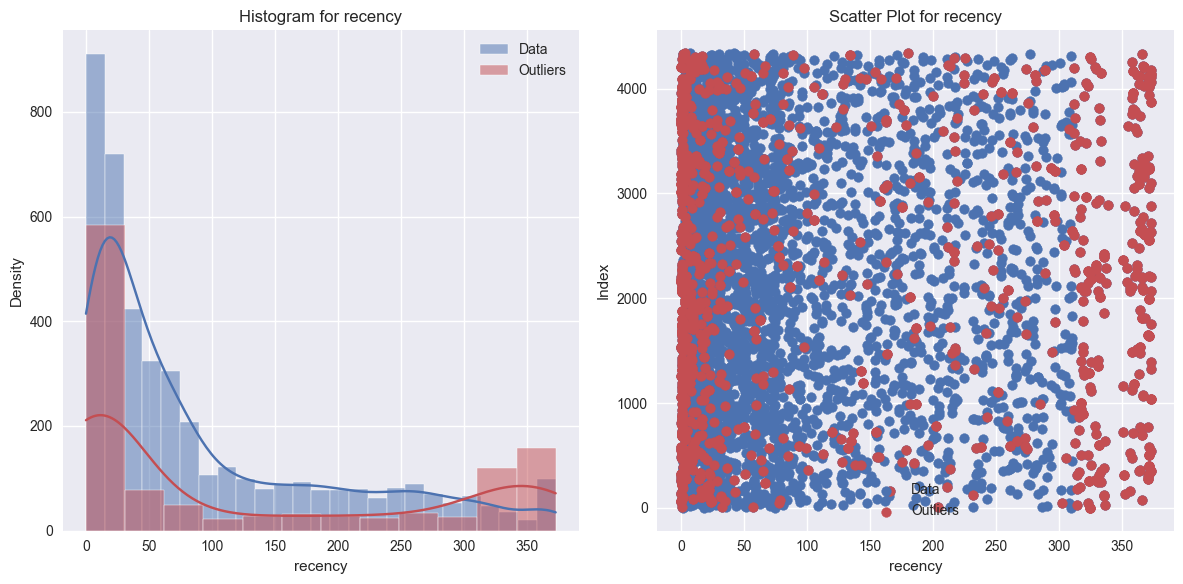

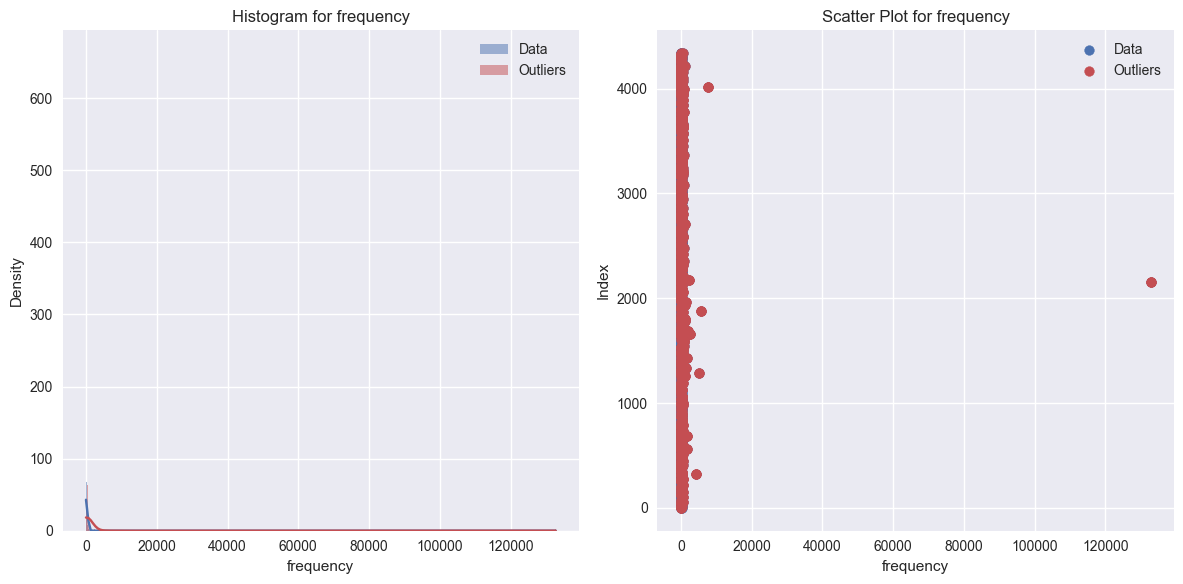

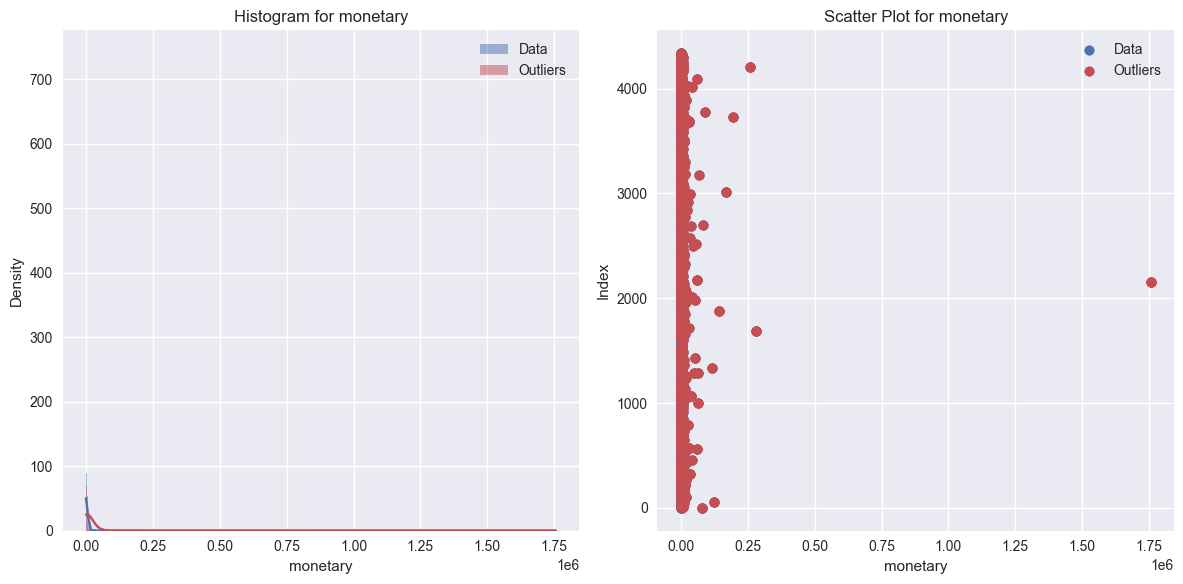

array([[   0,    0],
       [   0,    1],
       [   0,    2],
       ...,
       [4332,    2],
       [4335,    2],
       [4337,    1]], dtype=int64)

In [849]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def detect_outliers_quantile(df, columns, lower_threshold=0.05, upper_threshold=0.95):
    # Select the specified columns from the DataFrame
    data = df[columns].values

    # Calculate the lower and upper quantiles for each column
    lower_quantile = np.percentile(data, lower_threshold * 100, axis=0)
    upper_quantile = np.percentile(data, upper_threshold * 100, axis=0)

    # Identify outliers for each column
    outlier_mask = np.logical_or(data < lower_quantile, data > upper_quantile)

    # Get the indices of the outliers
    outlier_indices = np.argwhere(outlier_mask)

    # Plot histogram and scatter plot side by side for each column
    for i, column in enumerate(columns):
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        # Histogram plot
        sns.histplot(data[:, i], kde=True, color='b', alpha=0.5, label='Data', ax=axs[0])
        sns.histplot(data[outlier_indices[:, 0], i], kde=True, color='r', alpha=0.5, label='Outliers', ax=axs[0])
        axs[0].set_xlabel(column)
        axs[0].set_ylabel('Density')
        axs[0].set_title(f'Histogram for {column}')
        axs[0].legend()

        # Scatter plot
        axs[1].scatter(data[:, i], range(len(data)), color='b', label='Data')
        axs[1].scatter(data[outlier_indices[:, 0], i], outlier_indices[:, 0], color='r', label='Outliers')
        axs[1].set_xlabel(column)
        axs[1].set_ylabel('Index')
        axs[1].set_title(f'Scatter Plot for {column}')
        axs[1].legend()

        sns.despine()
        plt.tight_layout()
        plt.show()

    return outlier_indices


detect_outliers_quantile(rmf_table,columns_to_remove_outliers)

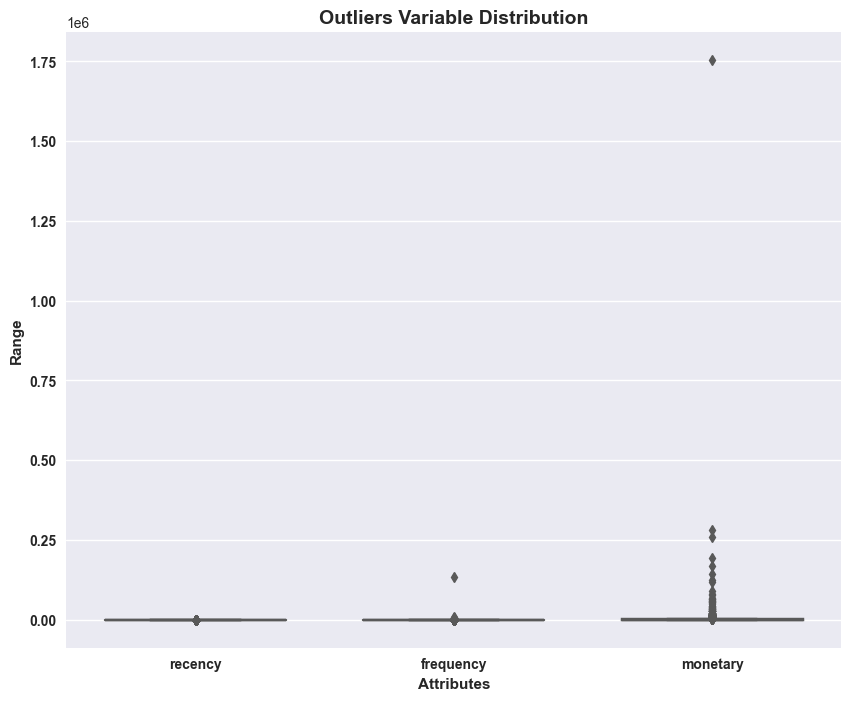

In [850]:
def plot_outlier_analysis(data, attributes):
    plt.rcParams['figure.figsize'] = [10, 8]
    sns.boxplot(data=data[attributes], orient="v", palette="Set2", whis=1.5, saturation=1, width=0.7)
    plt.title("Outliers Variable Distribution", fontsize=14, fontweight='bold')
    plt.ylabel("Range", fontweight='bold')
    plt.xlabel("Attributes", fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.show()
    
plot_outlier_analysis(rmf_table,columns_to_remove_outliers)

Remove Outliers

In [851]:
def remove_outliers(df, columns, threshold=1.5):
    # Select the specified columns from the DataFrame
    data = df[columns].copy()

    # Calculate the quartiles and IQR for each column
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1

    # Define the outlier boundaries
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    # Identify outliers for each column
    outlier_mask = (data < lower_bound) | (data > upper_bound)

    # Remove rows with outliers
    inliers = df[~outlier_mask.any(axis=1)]

    # Return the modified DataFrame without outliers
    return inliers


rmf_table_removed_out = remove_outliers(rmf_table, columns_to_remove_outliers)

HistPlot

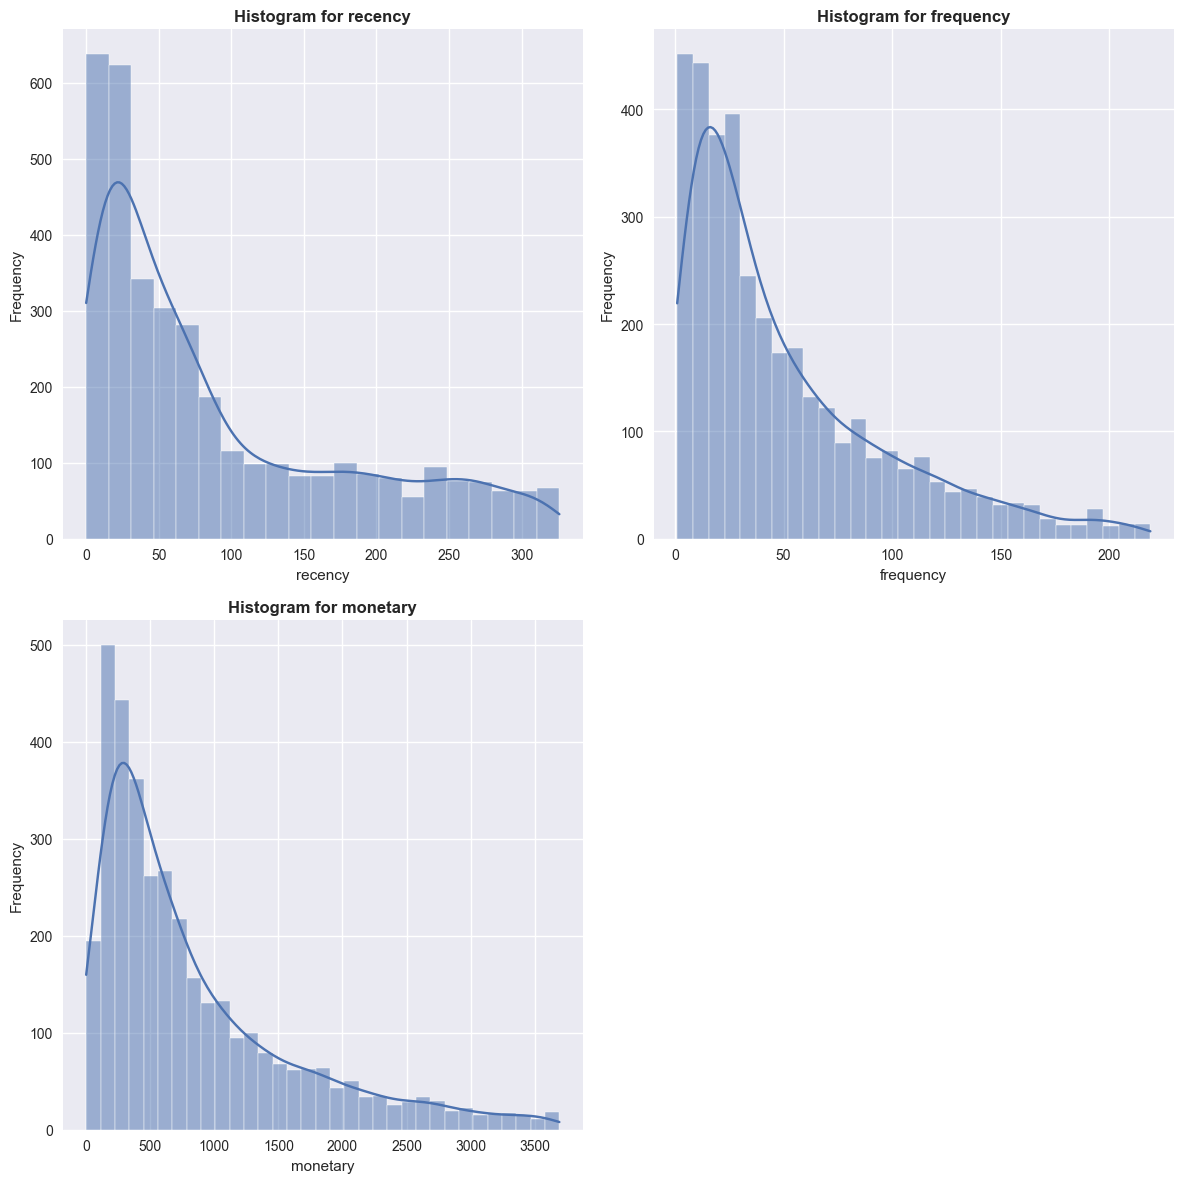

In [852]:
def plot_histograms(df, columns):
    num_plots = len(columns)
    num_rows = (num_plots + 1) // 2  # Calculate the number of rows for subplots

    fig, axs = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
    fig.subplots_adjust(hspace=0.4)  # Adjust the vertical spacing between subplots

    for i, column in enumerate(columns):
        row = i // 2
        col = i % 2
        ax = axs[row, col]

        sns.histplot(df[column], ax=ax, kde=True, color='b', alpha=0.5)
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.set_title(f'Histogram for {column}', fontweight='bold')
        ax.tick_params(axis='both', labelsize=10)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    # Hide empty subplots if there are an odd number of plots
    if num_plots % 2 != 0:
        axs[-1, -1].axis('off')

    plt.tight_layout()
    plt.show()
    
plot_histograms(rmf_table_removed_out,columns_to_remove_outliers)

In [853]:
from sklearn.preprocessing import StandardScaler

def Scale(df, columns):
    df_scaled = df.copy()
    scaler = StandardScaler()
    df_scaled[columns] = scaler.fit_transform(df[columns])
    return df_scaled

# Assuming you have already split your data into X_train and X_test
columns_to_scale = ['recency', 'frequency', 'monetary']

df_scaled = Scale(df=rmf_table_removed_out, columns=columns_to_scale)


In [854]:
df_scaled=df_scaled[['recency', 'frequency', 'monetary']]

In [855]:
df_scaled

recency  frequency  monetary
CustomerID                               
12348      -0.183566  -0.423903  1.202604
12349      -0.820970   0.471164  1.152186
12350       2.444330  -0.722259 -0.655649
12352      -0.619685   0.726897  2.102996
12353       1.258981  -0.999303 -0.967381
...              ...        ...       ...
18278      -0.205931  -0.892748 -0.859533
18280       2.075306  -0.871436 -0.851022
18281       0.990601  -0.935370 -0.977773
18282      -0.943978  -0.828814 -0.854261
18287      -0.552589   0.407231  1.253467

[3611 rows x 3 columns]

# Silhouette score

 - **Silhouette score** is a metric used to measure the quality of a clustering solution. It quantifies how well each data point fits into its assigned cluster based on two measures:
***
 - **Cohesion:** the average distance between a data point and all other points in the same cluster.

 - **Separation:** the average distance between a data point in one cluster and all data points in the nearest neighboring cluster.

***
 - The silhouette score ranges from -1 to 1, where a score closer to 1 indicates a better clustering solution. A score of 0 indicates that the data point is on the boundary between two clusters, and a score of -1 indicates that the data point is assigned to the wrong cluster.

 - In general, a higher silhouette score indicates that the clustering solution is more appropriate for the data. However, the optimal value for the silhouette score can vary depending on the specific problem and data set.

 - The silhouette score can be calculated using the silhouette_score function from the scikit-learn library in Python. In the context of k-means clustering, the silhouette score can be used to determine the optimal number of clusters, by comparing the scores for different values of k and selecting the value that maximizes the score.

# K-means++

 - Place the initial centroids far away from each other via the k-means++ algorithm, which leads to better and more consistent results than the classic k-means.
 - To use k-means++ with scikit-learn's KMeans object, we just need to set the init parameter to k-means++ (the default setting) instead of random.

In [856]:
rmf_data=df_scaled[['recency', 'frequency', 'monetary']]

In [857]:
rmf_data_test=df_scaled[['recency', 'frequency', 'monetary']]

In [858]:
rmf_data

recency  frequency  monetary
CustomerID                               
12348      -0.183566  -0.423903  1.202604
12349      -0.820970   0.471164  1.152186
12350       2.444330  -0.722259 -0.655649
12352      -0.619685   0.726897  2.102996
12353       1.258981  -0.999303 -0.967381
...              ...        ...       ...
18278      -0.205931  -0.892748 -0.859533
18280       2.075306  -0.871436 -0.851022
18281       0.990601  -0.935370 -0.977773
18282      -0.943978  -0.828814 -0.854261
18287      -0.552589   0.407231  1.253467

[3611 rows x 3 columns]

In [859]:
rmf_data_test

recency  frequency  monetary
CustomerID                               
12348      -0.183566  -0.423903  1.202604
12349      -0.820970   0.471164  1.152186
12350       2.444330  -0.722259 -0.655649
12352      -0.619685   0.726897  2.102996
12353       1.258981  -0.999303 -0.967381
...              ...        ...       ...
18278      -0.205931  -0.892748 -0.859533
18280       2.075306  -0.871436 -0.851022
18281       0.990601  -0.935370 -0.977773
18282      -0.943978  -0.828814 -0.854261
18287      -0.552589   0.407231  1.253467

[3611 rows x 3 columns]

In [860]:
# Remove the index
rmf_data = rmf_data.reset_index(drop=True)
rmf_data

recency  frequency  monetary
0    -0.183566  -0.423903  1.202604
1    -0.820970   0.471164  1.152186
2     2.444330  -0.722259 -0.655649
3    -0.619685   0.726897  2.102996
4     1.258981  -0.999303 -0.967381
...        ...        ...       ...
3606 -0.205931  -0.892748 -0.859533
3607  2.075306  -0.871436 -0.851022
3608  0.990601  -0.935370 -0.977773
3609 -0.943978  -0.828814 -0.854261
3610 -0.552589   0.407231  1.253467

[3611 rows x 3 columns]

Making Final Dataframe

In [861]:
rmf_result_train=rmf_table_removed_out[['recency','frequency','monetary']]
rmf_result_train

recency  frequency  monetary
CustomerID                              
12348            75         31   1797.24
12349            18         73   1757.55
12350           310         17    334.40
12352            36         85   2506.04
12353           204          4     89.00
...             ...        ...       ...
18278            73          9    173.90
18280           277         10    180.60
18281           180          7     80.82
18282             7         12    178.05
18287            42         70   1837.28

[3611 rows x 3 columns]

In [862]:
rmf_data.head()

recency  frequency  monetary
0 -0.183566  -0.423903  1.202604
1 -0.820970   0.471164  1.152186
2  2.444330  -0.722259 -0.655649
3 -0.619685   0.726897  2.102996
4  1.258981  -0.999303 -0.967381

In [863]:
rmf_data.dtypes

recency      float64
frequency    float64
monetary     float64
dtype: object

### WCSS Score

WCSS (Within-Cluster Sum of Squares) is a metric commonly used in clustering analysis to determine the optimal number of clusters in a dataset. It helps in identifying the "elbow point" in the plot of WCSS versus the number of clusters. The elbow point indicates the number of clusters where the addition of more clusters does not significantly reduce the WCSS.

The WCSS measures the compactness or tightness of the data points within each cluster. It calculates the sum of squared distances between each data point and the centroid of its assigned cluster. The goal of clustering is to minimize this WCSS value, as it indicates that the data points are closely grouped together within their respective clusters.

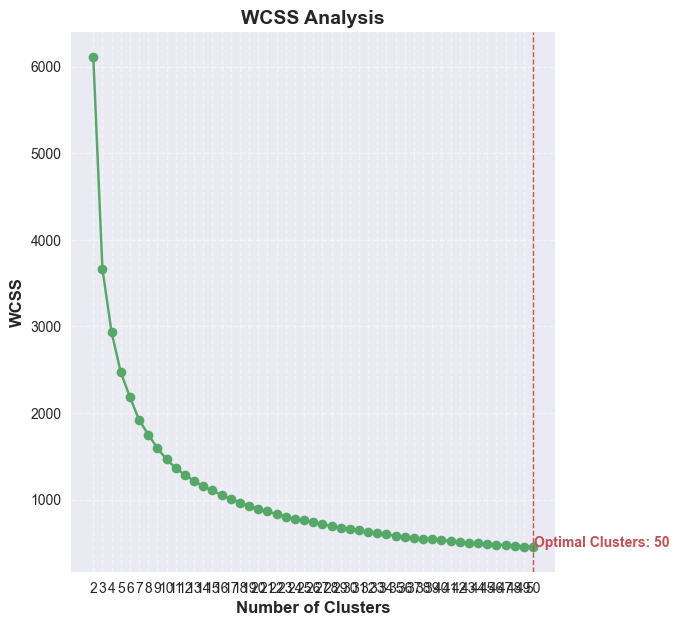

50

In [864]:

from sklearn.cluster import KMeans


def choose_clusters(df, max_clusters=50):
   
    wcss_scores = []
 

    
    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        kmeans.fit(df)
        labels = kmeans.predict(df)
        wcss = kmeans.inertia_  # Access the inertia_/WCSS attribute
        wcss_scores.append(wcss)
    
    optimal_clusters_wcss = np.argmin(wcss_scores) + 2

    
    plt.figure(figsize=(12, 12))
    

    plt.subplot(2, 2, 2)
    plt.plot(range(2, max_clusters+1), wcss_scores, marker='o', linestyle='-', color='g')
    plt.xlabel('Number of Clusters', fontsize=12, fontweight='bold')
    plt.ylabel('WCSS', fontsize=12, fontweight='bold')
    plt.title('WCSS Analysis', fontsize=14, fontweight='bold')
    plt.xticks(range(2, max_clusters+1))
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.axvline(x=optimal_clusters_wcss, color='r', linestyle='--', linewidth=1)
    plt.text(optimal_clusters_wcss+0.1, np.min(wcss_scores), f'Optimal Clusters: {optimal_clusters_wcss}', color='r', fontsize=10, fontweight='bold')
    
    
    plt.tight_layout()
    plt.show()
    
    return optimal_clusters_wcss


choose_clusters(rmf_data)



Considering optimal cluster to be around 4 or 5 Clusters 

In [865]:
rmf_data

recency  frequency  monetary
0    -0.183566  -0.423903  1.202604
1    -0.820970   0.471164  1.152186
2     2.444330  -0.722259 -0.655649
3    -0.619685   0.726897  2.102996
4     1.258981  -0.999303 -0.967381
...        ...        ...       ...
3606 -0.205931  -0.892748 -0.859533
3607  2.075306  -0.871436 -0.851022
3608  0.990601  -0.935370 -0.977773
3609 -0.943978  -0.828814 -0.854261
3610 -0.552589   0.407231  1.253467

[3611 rows x 3 columns]

In [866]:
from sklearn.cluster import KMeans

def perform_kmeans_clustering(df, n_clusters=4):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(df)
    labels = kmeans.predict(df)

    rfm_kmean=df.copy()
    
    rfm_kmean['kmean_cluster'] =labels
    return rfm_kmean,kmeans

rfm_kmean,kmeans_model=perform_kmeans_clustering(rmf_data)



In [867]:
rfm_kmean

recency  frequency  monetary  kmean_cluster
0    -0.183566  -0.423903  1.202604              0
1    -0.820970   0.471164  1.152186              0
2     2.444330  -0.722259 -0.655649              3
3    -0.619685   0.726897  2.102996              1
4     1.258981  -0.999303 -0.967381              3
...        ...        ...       ...            ...
3606 -0.205931  -0.892748 -0.859533              2
3607  2.075306  -0.871436 -0.851022              3
3608  0.990601  -0.935370 -0.977773              3
3609 -0.943978  -0.828814 -0.854261              2
3610 -0.552589   0.407231  1.253467              0

[3611 rows x 4 columns]

In [868]:

rmf_result=rfm_kmean

In [869]:
rmf_result

recency  frequency  monetary  kmean_cluster
0    -0.183566  -0.423903  1.202604              0
1    -0.820970   0.471164  1.152186              0
2     2.444330  -0.722259 -0.655649              3
3    -0.619685   0.726897  2.102996              1
4     1.258981  -0.999303 -0.967381              3
...        ...        ...       ...            ...
3606 -0.205931  -0.892748 -0.859533              2
3607  2.075306  -0.871436 -0.851022              3
3608  0.990601  -0.935370 -0.977773              3
3609 -0.943978  -0.828814 -0.854261              2
3610 -0.552589   0.407231  1.253467              0

[3611 rows x 4 columns]

Kmean_cluster added to result Dataframe

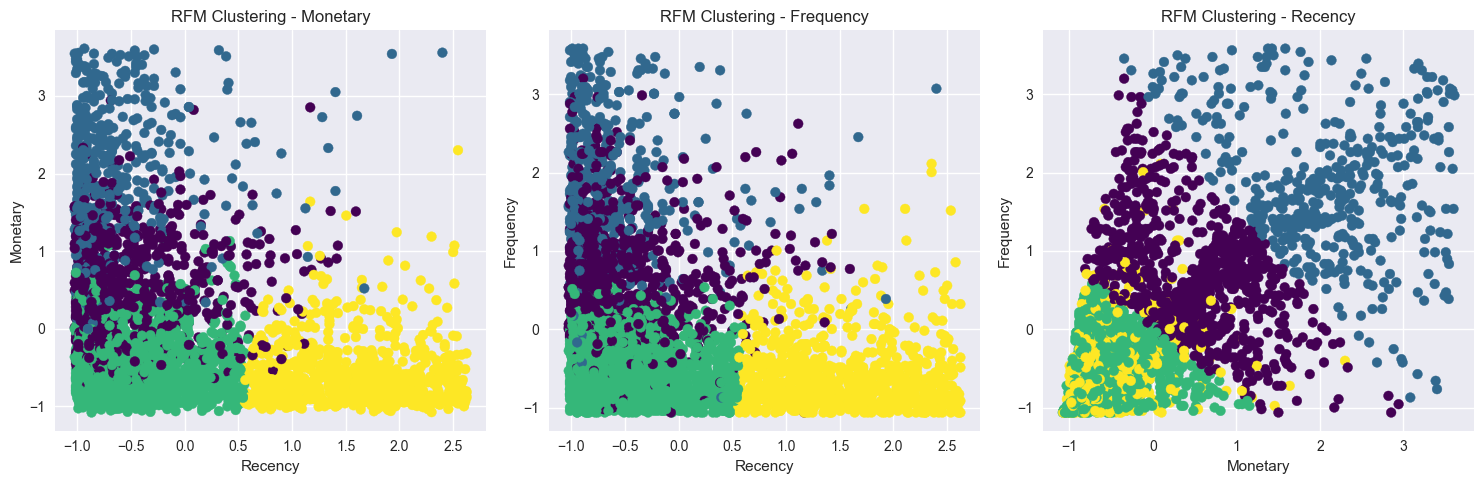

In [870]:
import matplotlib.pyplot as plt

def plot_rfm_clusters(rfm_df):
    # Extract RFM components and cluster labels
    recency = rfm_df['recency']
    frequency = rfm_df['frequency']
    monetary = rfm_df['monetary']
    cluster_labels = rfm_df['kmean_cluster']
    
    # Create subplots for Monetary, Frequency, and Recency
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Plot for Monetary
    axes[0].scatter(recency, monetary, c=cluster_labels, cmap='viridis')
    axes[0].set_xlabel('Recency')
    axes[0].set_ylabel('Monetary')
    axes[0].set_title('RFM Clustering - Monetary')
    
    # Plot for Frequency
    axes[1].scatter(recency, frequency, c=cluster_labels, cmap='viridis')
    axes[1].set_xlabel('Recency')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('RFM Clustering - Frequency')
    
    # Plot for Recency
    axes[2].scatter(monetary, frequency, c=cluster_labels, cmap='viridis')
    axes[2].set_xlabel('Monetary')
    axes[2].set_ylabel('Frequency')
    axes[2].set_title('RFM Clustering - Recency')
    
    plt.tight_layout()
    plt.show()

    
plot_rfm_clusters(rfm_kmean)

Based on the analysis taking optimel clusters to be 4

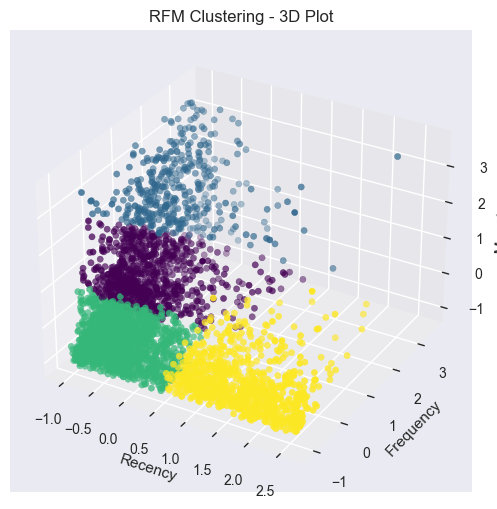

In [871]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_rfm_clusters_3d(rfm_df):
    # Extract RFM components and cluster labels
    recency = rfm_df['recency']
    frequency = rfm_df['frequency']
    monetary = rfm_df['monetary']
    cluster_labels = rfm_df['kmean_cluster']
    
    # Create 3D plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot
    ax.scatter(recency, frequency, monetary, c=cluster_labels, cmap='viridis')
    
    # Set labels and title
    ax.set_xlabel('Recency')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Monetary')
    ax.set_title('RFM Clustering - 3D Plot')
    
    plt.show()
    
plot_rfm_clusters_3d(rfm_kmean)


In [872]:
import plotly.express as px

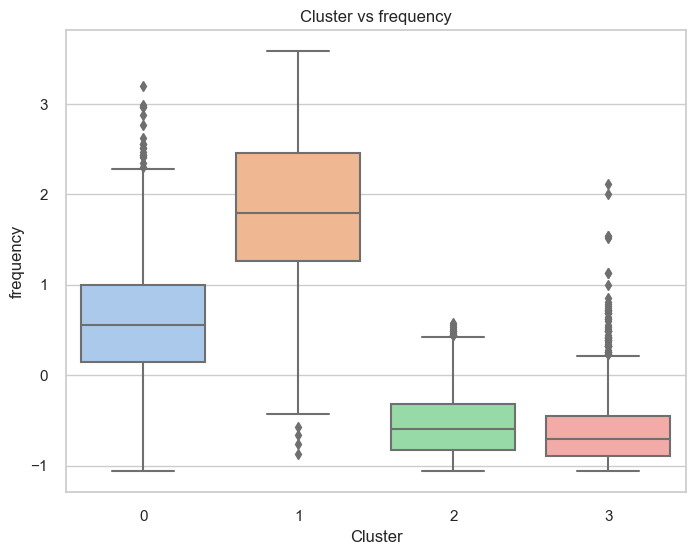

In [875]:
def plot_cluster_vs_recency(dataframe):
    sns.set(style="whitegrid", palette="pastel")
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='kmean_cluster', y='frequency', data=dataframe)
    plt.xlabel('Cluster')
    plt.ylabel('frequency')
    plt.title('Cluster vs frequency')
    plt.show()
    
plot_cluster_vs_recency(rfm_kmean)

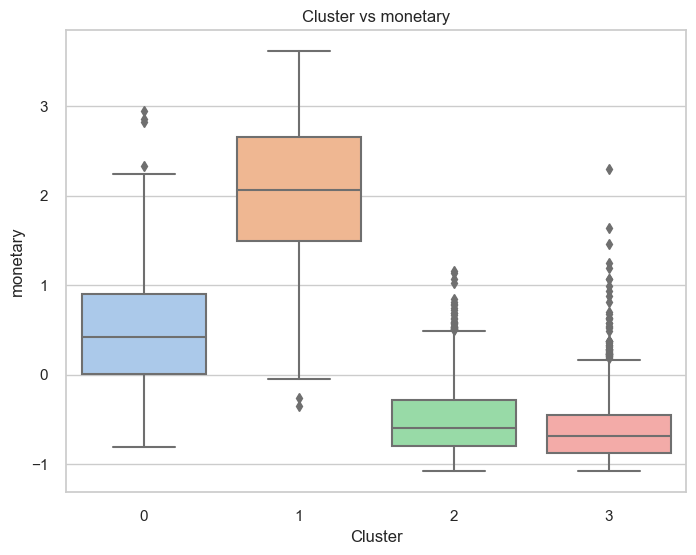

In [876]:
def plot_cluster_vs_recency(dataframe):
    sns.set(style="whitegrid", palette="pastel")
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='kmean_cluster', y='monetary', data=dataframe)
    plt.xlabel('Cluster')
    plt.ylabel('monetary')
    plt.title('Cluster vs monetary')
    plt.show()
    
plot_cluster_vs_recency(rfm_kmean)

# Hierarchical clustering

 - **Hierarchical clustering** is a type of unsupervised machine learning algorithm used to group together similar objects into clusters. It is a bottom-up approach in which the algorithm starts with each data point as its own cluster and iteratively merges the closest pairs of clusters until all data points belong to a single cluster or a predefined number of clusters is reached.
***
There are two types of hierarchical clustering:

 - **Agglomerative clustering:** This is the most common approach, in which the algorithm starts with each data point as a separate cluster and iteratively merges the closest pairs of clusters until all data points belong to a single cluster.

 - **Divisive clustering:** This is a top-down approach in which the algorithm starts with all data points in a single cluster and recursively splits the cluster into smaller subclusters until each data point is in its own cluster.

***
 - Hierarchical clustering can be visualized using a dendrogram, which is a tree-like diagram that shows the hierarchy of clusters. The height of each branch in the dendrogram represents the distance between the clusters being merged.

 - Hierarchical clustering has many applications, including in market segmentation, image analysis, and bioinformatics.



 - In **hierarchical clustering,** the choice of linkage method determines how the distance between two clusters is calculated. The linkage method is used to merge clusters at each step of the algorithm.




 - **Ward's method** is a popular linkage method that minimizes the sum of squared differences within all clusters. It tries to minimize the variance of the clusters being merged, and thus tends to create compact, spherical clusters.

In [877]:
from scipy.cluster.hierarchy import fcluster

In [878]:
rmf_data

recency  frequency  monetary
0    -0.183566  -0.423903  1.202604
1    -0.820970   0.471164  1.152186
2     2.444330  -0.722259 -0.655649
3    -0.619685   0.726897  2.102996
4     1.258981  -0.999303 -0.967381
...        ...        ...       ...
3606 -0.205931  -0.892748 -0.859533
3607  2.075306  -0.871436 -0.851022
3608  0.990601  -0.935370 -0.977773
3609 -0.943978  -0.828814 -0.854261
3610 -0.552589   0.407231  1.253467

[3611 rows x 3 columns]

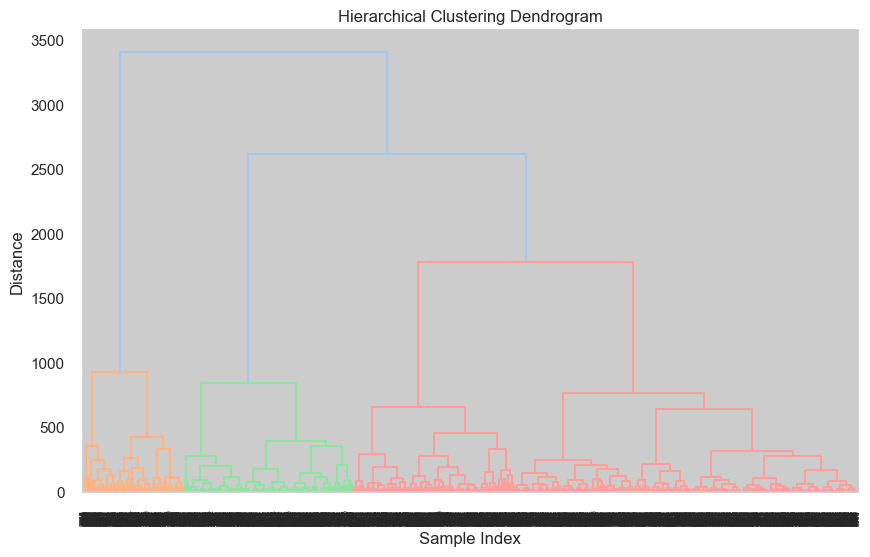

In [879]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

def hierarchical_clustering(data, distance_metric='euclidean', linkage_criteria='ward', plot_dendrogram=True):
    # Compute the distance matrix
    distances = cdist(data, data, metric=distance_metric)

    # Perform hierarchical clustering
    linkage_matrix = linkage(distances, method=linkage_criteria)

    # Plot the dendrogram
    if plot_dendrogram:
        plt.figure(figsize=(10, 6))
        dendrogram(linkage_matrix)
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('Sample Index')
        plt.ylabel('Distance')
        plt.show()
        

    # Return the linkage matrix and cluster assignments
    return linkage_matrix

linkage_matrix=hierarchical_clustering(rmf_data)


 - Dendrograms can provide insights into the hierarchical structure of the data by showing how the data points are grouped based on their similarity. The height of the branches in a dendrogram shows the degree of similarity between the clusters or data points being merged.
 
 - The dendrogram can help in identifying natural clusters in the data based on the similarity measure used in clustering. It can also help in deciding the appropriate number of clusters to use in further analysis. The position of the horizontal line where the dendrogram is cut determines the number of clusters. Clusters can be identified by looking at the groups of data points that are formed below the cut-off line
 


In [880]:
from scipy.cluster.hierarchy import fcluster

def extract_clusters(linkage_matrix):
    # Extract clusters from linkage matrix
    cluster_labels = fcluster(linkage_matrix,t=3,criterion='maxclust')
    
    # Count the unique labels to get the number of clusters
    n_clusters = len(set(cluster_labels))
    print('Number of clusters:', n_clusters)

    # Return cluster labels
    return cluster_labels

cluster_labels=extract_clusters(linkage_matrix)

Number of clusters: 3


In [881]:
cluster_labels

array([3, 3, 2, ..., 2, 3, 3], dtype=int32)

In [882]:
rmf_result['hc_cluster']=cluster_labels

In [883]:
rfm_table_hc=rmf_data.copy()

In [884]:
rfm_table_hc['cluster']=cluster_labels

In [885]:
rmf_result

recency  frequency  monetary  kmean_cluster  hc_cluster
0    -0.183566  -0.423903  1.202604              0           3
1    -0.820970   0.471164  1.152186              0           3
2     2.444330  -0.722259 -0.655649              3           2
3    -0.619685   0.726897  2.102996              1           1
4     1.258981  -0.999303 -0.967381              3           2
...        ...        ...       ...            ...         ...
3606 -0.205931  -0.892748 -0.859533              2           3
3607  2.075306  -0.871436 -0.851022              3           2
3608  0.990601  -0.935370 -0.977773              3           2
3609 -0.943978  -0.828814 -0.854261              2           3
3610 -0.552589   0.407231  1.253467              0           3

[3611 rows x 5 columns]

In [886]:
rfm_table_hc

recency  frequency  monetary  cluster
0    -0.183566  -0.423903  1.202604        3
1    -0.820970   0.471164  1.152186        3
2     2.444330  -0.722259 -0.655649        2
3    -0.619685   0.726897  2.102996        1
4     1.258981  -0.999303 -0.967381        2
...        ...        ...       ...      ...
3606 -0.205931  -0.892748 -0.859533        3
3607  2.075306  -0.871436 -0.851022        2
3608  0.990601  -0.935370 -0.977773        2
3609 -0.943978  -0.828814 -0.854261        3
3610 -0.552589   0.407231  1.253467        3

[3611 rows x 4 columns]

Addign cluster to dataframe

In [887]:
rmf_result['hc_cluster']

0       3
1       3
2       2
3       1
4       2
       ..
3606    3
3607    2
3608    2
3609    3
3610    3
Name: hc_cluster, Length: 3611, dtype: int32

In [888]:
rmf_result

recency  frequency  monetary  kmean_cluster  hc_cluster
0    -0.183566  -0.423903  1.202604              0           3
1    -0.820970   0.471164  1.152186              0           3
2     2.444330  -0.722259 -0.655649              3           2
3    -0.619685   0.726897  2.102996              1           1
4     1.258981  -0.999303 -0.967381              3           2
...        ...        ...       ...            ...         ...
3606 -0.205931  -0.892748 -0.859533              2           3
3607  2.075306  -0.871436 -0.851022              3           2
3608  0.990601  -0.935370 -0.977773              3           2
3609 -0.943978  -0.828814 -0.854261              2           3
3610 -0.552589   0.407231  1.253467              0           3

[3611 rows x 5 columns]

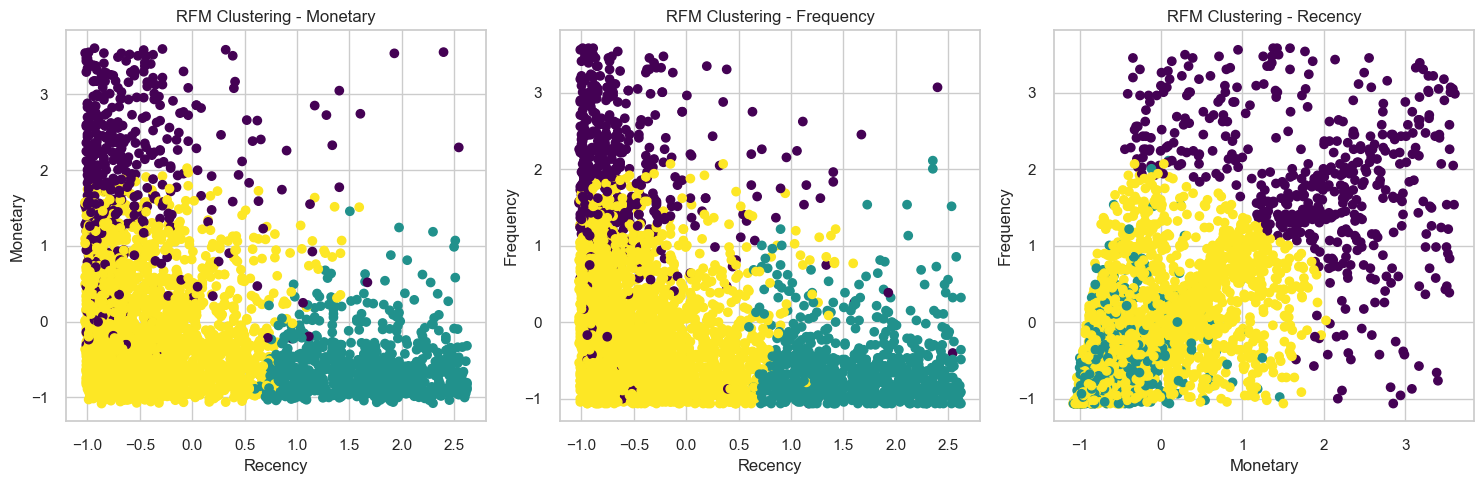

In [889]:
import matplotlib.pyplot as plt

def plot_rfm_clusters(rfm_df):
    # Extract RFM components and cluster labels
    recency = rfm_df['recency']
    frequency = rfm_df['frequency']
    monetary = rfm_df['monetary']
    cluster_labels = rfm_df['cluster']
    
    # Create subplots for Monetary, Frequency, and Recency
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Plot for Monetary
    axes[0].scatter(recency, monetary, c=cluster_labels, cmap='viridis')
    axes[0].set_xlabel('Recency')
    axes[0].set_ylabel('Monetary')
    axes[0].set_title('RFM Clustering - Monetary')
    
    # Plot for Frequency
    axes[1].scatter(recency, frequency, c=cluster_labels, cmap='viridis')
    axes[1].set_xlabel('Recency')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('RFM Clustering - Frequency')
    
    # Plot for Recency
    axes[2].scatter(monetary, frequency, c=cluster_labels, cmap='viridis')
    axes[2].set_xlabel('Monetary')
    axes[2].set_ylabel('Frequency')
    axes[2].set_title('RFM Clustering - Recency')
    
    plt.tight_layout()
    plt.show()

    
plot_rfm_clusters(rfm_table_hc)

In [1]:
import matplotlib.pyplot as plt

def plot_rfm_clusters(rfm_df):
    # Extract RFM components and cluster labels
    recency = rfm_df['recency']
    frequency = rfm_df['frequency']
    monetary = rfm_df['monetary']
    cluster_labels = rfm_df['cluster']
    
    # Create subplots for Monetary, Frequency, and Recency
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Plot for Monetary
    axes[0].scatter(recency, monetary, c=cluster_labels, cmap='viridis')
    axes[0].set_xlabel('Recency')
    axes[0].set_ylabel('Monetary')
    axes[0].set_title('RFM Clustering - Monetary')
    
    # Plot for Frequency
    axes[1].scatter(recency, frequency, c=cluster_labels, cmap='viridis')
    axes[1].set_xlabel('Recency')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('RFM Clustering - Frequency')
    
    # Plot for Recency
    axes[2].scatter(monetary, frequency, c=cluster_labels, cmap='viridis')
    axes[2].set_xlabel('Monetary')
    axes[2].set_ylabel('Frequency')
    axes[2].set_title('RFM Clustering - Recency')
    
    plt.tight_layout()
    plt.show()

    
plot_rfm_clusters(rfm_table_hc)

NameError: name 'rfm_table_hc' is not defined

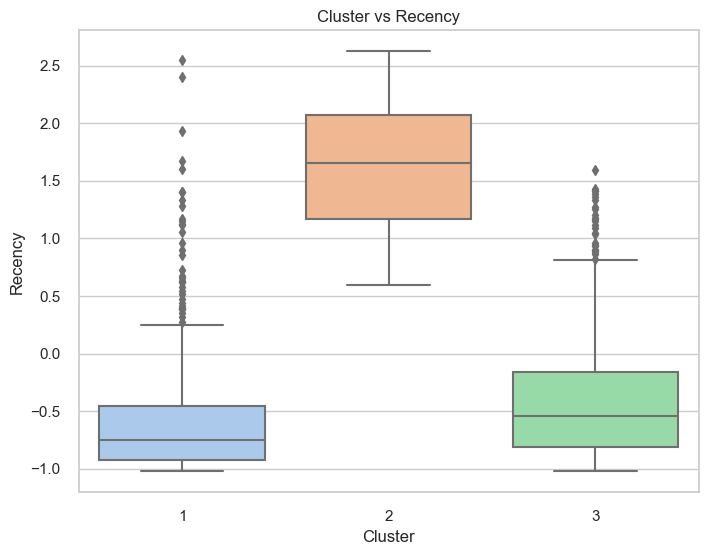

In [890]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cluster_vs_recency(dataframe):
    sns.set(style="whitegrid", palette="pastel")
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='cluster', y='recency', data=dataframe)
    plt.xlabel('Cluster')
    plt.ylabel('Recency')
    plt.title('Cluster vs Recency')
    plt.show()
    
plot_cluster_vs_recency(rfm_table_hc)

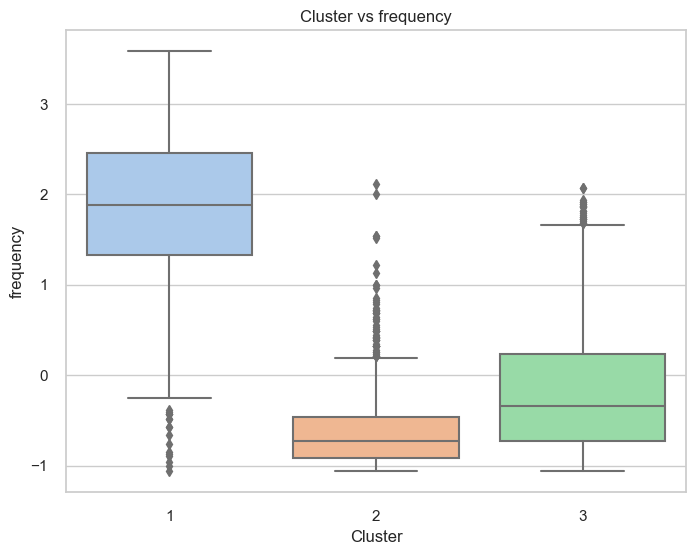

In [891]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cluster_vs_recency(dataframe):
    sns.set(style="whitegrid", palette="pastel")
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='cluster', y='frequency', data=dataframe)
    plt.xlabel('Cluster')
    plt.ylabel('frequency')
    plt.title('Cluster vs frequency')
    plt.show()
    
plot_cluster_vs_recency(rfm_table_hc)


In [892]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cluster_vs_recency(dataframe):
    sns.set(style="whitegrid", palette="pastel")
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='cluster', y='monetary', data=dataframe)
    plt.xlabel('Cluster')
    plt.ylabel('monetary')
    plt.title('Cluster vs monetary')
    plt.show()
    


# DB Scan 

Choosing the appropriate value for epsilon (ε) in DBSCAN is crucial for the clustering performance. Epsilon determines the radius around each point that defines its neighborhood. Points within this radius are considered neighbors and are used to determine the density of the point and its cluster membership.

#### Epsilon

In [895]:
rmf_data

recency  frequency  monetary
0    -0.183566  -0.423903  1.202604
1    -0.820970   0.471164  1.152186
2     2.444330  -0.722259 -0.655649
3    -0.619685   0.726897  2.102996
4     1.258981  -0.999303 -0.967381
...        ...        ...       ...
3606 -0.205931  -0.892748 -0.859533
3607  2.075306  -0.871436 -0.851022
3608  0.990601  -0.935370 -0.977773
3609 -0.943978  -0.828814 -0.854261
3610 -0.552589   0.407231  1.253467

[3611 rows x 3 columns]

Elbow Method

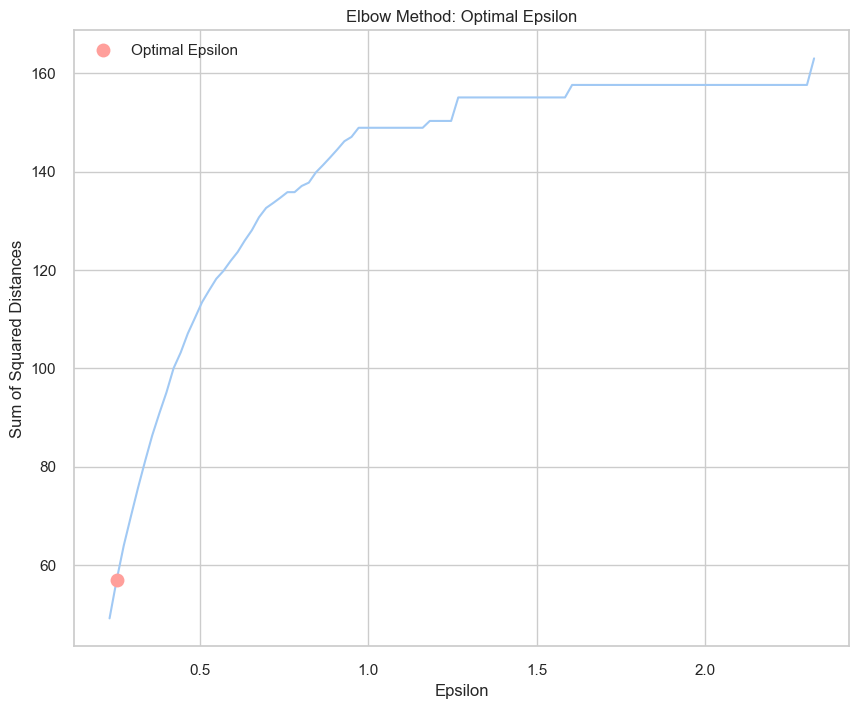

0.25346649178213776

In [896]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def find_optimal_epsilon(data, min_samples):
    # Compute k-distance graph
    neigh = NearestNeighbors(n_neighbors=min_samples)
    distances, _ = neigh.fit(data).kneighbors(data)
    k_distances = np.sort(distances[:, -1])

    # Calculate SSE for different epsilon values
    sse = []
    epsilon_values = np.linspace(0.1 * np.max(k_distances), np.max(k_distances), num=100)
    for epsilon in epsilon_values:
        core_samples_mask = distances[:, -1] <= epsilon
        num_clusters = len(np.unique(core_samples_mask))
        sse.append(np.sum(distances[:, -1][core_samples_mask] ** 2))

    # Plot SSE values against epsilon values
    plt.plot(epsilon_values, sse)
    plt.xlabel('Epsilon')
    plt.ylabel('Sum of Squared Distances')
    plt.title('Elbow Method: Optimal Epsilon')

    # Find elbow point (optimal epsilon)
    distances_sse_ratio = np.diff(sse) / np.diff(epsilon_values)
    optimal_index = np.argmax(distances_sse_ratio) + 1
    optimal_epsilon = epsilon_values[optimal_index]

    # Mark the optimal epsilon on the plot
    plt.plot(optimal_epsilon, sse[optimal_index], 'ro', markersize=10, label='Optimal Epsilon')
    plt.legend()
    plt.show()

    return optimal_epsilon


find_optimal_epsilon(rmf_data,min_samples=5)

In [897]:



def estimate_epsilon(df, min_samples, percentage):
    # Select relevant features from the DataFrame
    data = df[['recency', 'frequency', 'monetary']].values

    # Compute k-distance graph
    neigh = NearestNeighbors(n_neighbors=min_samples)
    distances, _ = neigh.fit(data).kneighbors(data)
    distances = np.sort(distances[:, -1])

    # Select the percentage of the maximum reachability distance as epsilon
    epsilon = np.percentile(distances, percentage)
    return epsilon

epsilon = estimate_epsilon(rmf_data, min_samples=5, percentage=5)
print("Estimated Epsilon:", epsilon)

Estimated Epsilon: 0.05766500579169703


In [898]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from itertools import product

In [899]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from itertools import product
import numpy as np

def find_best_dbscan(rmf_dataframe, eps_values, min_samples_values):
    best_score = -1
    best_result = None

    # Convert DataFrame to NumPy array
    rmf_array = rmf_dataframe.values

    for eps, min_samples in product(eps_values, min_samples_values):
        # Scale the RMF values
        scaler = StandardScaler()
        rmf_scaled = scaler.fit_transform(rmf_array)

        # Apply DBSCAN algorithm
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(rmf_scaled)

        # Check the number of unique labels generated
        unique_labels = len(set(dbscan.labels_))
        if unique_labels <= 1:
            continue  # Skip unsuccessful clustering attempts

        # Calculate silhouette score
        score = silhouette_score(rmf_scaled, dbscan.labels_)

        # Update best result if score is higher
        if score > best_score:
            best_score = score
            best_result = dbscan.labels_
            
        rmf_dbscan=rmf_dataframe.copy()
        rmf_dbscan['cluster']=best_result

    # Return the cluster labels
    return rmf_dbscan

rmf_dbscan=find_best_dbscan(rmf_data,eps_values=[0.05,0.1,0.2,0.3,0.4,0.5,0.7,1,1.3,1.5,1.7,1.8,1.9,2.0],min_samples_values=[1,2,3,4,5,6,7,8,9,10])


In [900]:
rmf_dbscan['cluster']

0       0
1       0
2       0
3       0
4       0
       ..
3606    0
3607    0
3608    0
3609    0
3610    0
Name: cluster, Length: 3611, dtype: int64

Cluster to result dataframe

In [901]:
rmf_result['db_scan_cluster']=rmf_dbscan['cluster']

In [902]:
rmf_result

recency  frequency  monetary  kmean_cluster  hc_cluster  \
0    -0.183566  -0.423903  1.202604              0           3   
1    -0.820970   0.471164  1.152186              0           3   
2     2.444330  -0.722259 -0.655649              3           2   
3    -0.619685   0.726897  2.102996              1           1   
4     1.258981  -0.999303 -0.967381              3           2   
...        ...        ...       ...            ...         ...   
3606 -0.205931  -0.892748 -0.859533              2           3   
3607  2.075306  -0.871436 -0.851022              3           2   
3608  0.990601  -0.935370 -0.977773              3           2   
3609 -0.943978  -0.828814 -0.854261              2           3   
3610 -0.552589   0.407231  1.253467              0           3   

      db_scan_cluster  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
3606                0  
3607                0  
3608                0  
3609                0  
3610                0  

[3611 rows x 6 columns]

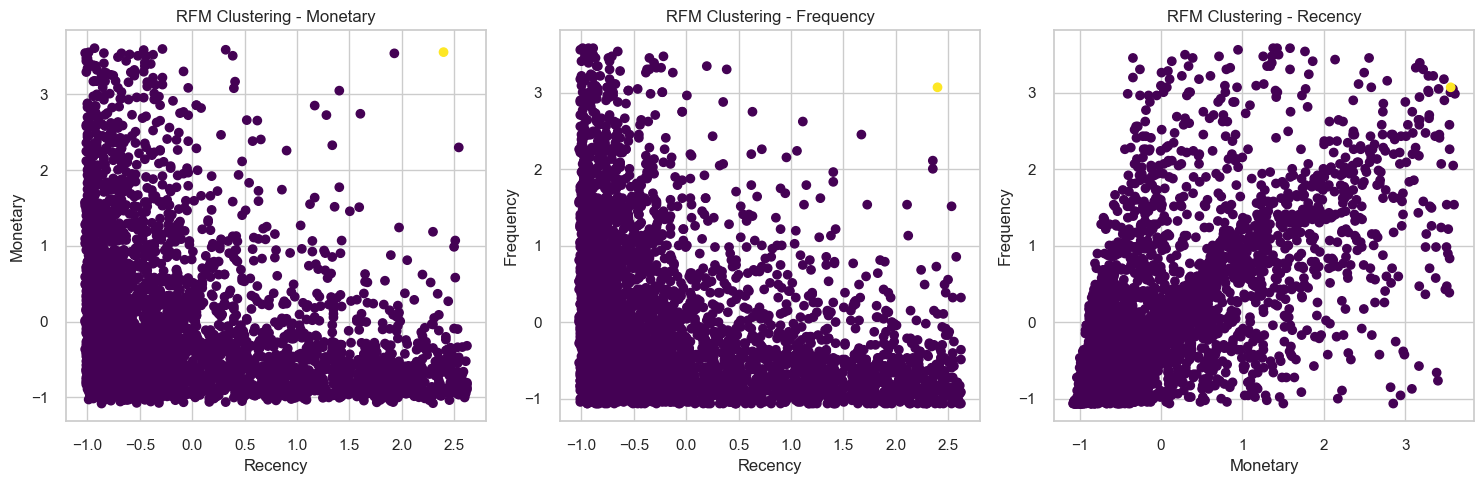

In [903]:

plot_rfm_clusters(rmf_dbscan)

In [904]:
rmf_data

recency  frequency  monetary
0    -0.183566  -0.423903  1.202604
1    -0.820970   0.471164  1.152186
2     2.444330  -0.722259 -0.655649
3    -0.619685   0.726897  2.102996
4     1.258981  -0.999303 -0.967381
...        ...        ...       ...
3606 -0.205931  -0.892748 -0.859533
3607  2.075306  -0.871436 -0.851022
3608  0.990601  -0.935370 -0.977773
3609 -0.943978  -0.828814 -0.854261
3610 -0.552589   0.407231  1.253467

[3611 rows x 3 columns]

# Algometric Clustering

In [905]:
rmf_data

recency  frequency  monetary
0    -0.183566  -0.423903  1.202604
1    -0.820970   0.471164  1.152186
2     2.444330  -0.722259 -0.655649
3    -0.619685   0.726897  2.102996
4     1.258981  -0.999303 -0.967381
...        ...        ...       ...
3606 -0.205931  -0.892748 -0.859533
3607  2.075306  -0.871436 -0.851022
3608  0.990601  -0.935370 -0.977773
3609 -0.943978  -0.828814 -0.854261
3610 -0.552589   0.407231  1.253467

[3611 rows x 3 columns]

In [906]:

from sklearn.cluster import AgglomerativeClustering
import pandas as pd

def agglomerative_clustering_rmf(rmf_table, n_clusters):
    # Perform Agglomerative Clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = clustering.fit_predict(rmf_table)
    
    rmf_ac=rmf_table.copy()
    
    # Add cluster labels as a new column in the DataFrame
    rmf_ac['cluster'] = labels
    
    # Return the DataFrame with cluster labels
    return rmf_ac

rmf_ac=agglomerative_clustering_rmf(rmf_data,n_clusters=3)

In [907]:
rmf_ac

recency  frequency  monetary  cluster
0    -0.183566  -0.423903  1.202604        2
1    -0.820970   0.471164  1.152186        1
2     2.444330  -0.722259 -0.655649        0
3    -0.619685   0.726897  2.102996        1
4     1.258981  -0.999303 -0.967381        0
...        ...        ...       ...      ...
3606 -0.205931  -0.892748 -0.859533        2
3607  2.075306  -0.871436 -0.851022        0
3608  0.990601  -0.935370 -0.977773        0
3609 -0.943978  -0.828814 -0.854261        2
3610 -0.552589   0.407231  1.253467        1

[3611 rows x 4 columns]

Adding cluster to result dataframe

In [908]:
rmf_result['ac_cluster']=rmf_ac['cluster']

In [909]:
rmf_result

recency  frequency  monetary  kmean_cluster  hc_cluster  \
0    -0.183566  -0.423903  1.202604              0           3   
1    -0.820970   0.471164  1.152186              0           3   
2     2.444330  -0.722259 -0.655649              3           2   
3    -0.619685   0.726897  2.102996              1           1   
4     1.258981  -0.999303 -0.967381              3           2   
...        ...        ...       ...            ...         ...   
3606 -0.205931  -0.892748 -0.859533              2           3   
3607  2.075306  -0.871436 -0.851022              3           2   
3608  0.990601  -0.935370 -0.977773              3           2   
3609 -0.943978  -0.828814 -0.854261              2           3   
3610 -0.552589   0.407231  1.253467              0           3   

      db_scan_cluster  ac_cluster  
0                   0           2  
1                   0           1  
2                   0           0  
3                   0           1  
4                   0           0  
...               ...         ...  
3606                0           2  
3607                0           0  
3608                0           0  
3609                0           2  
3610                0           1  

[3611 rows x 7 columns]

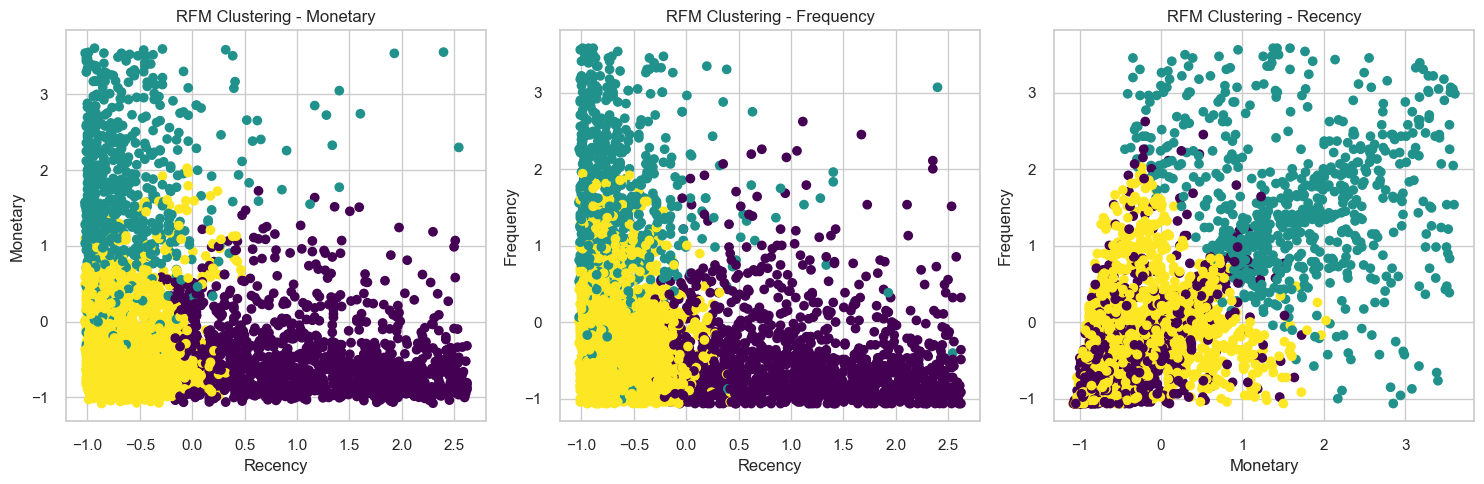

In [910]:
plot_rfm_clusters(rmf_ac)

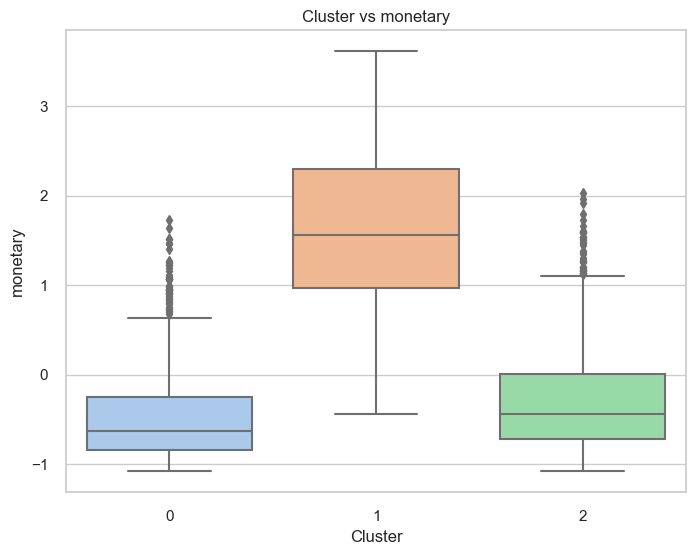

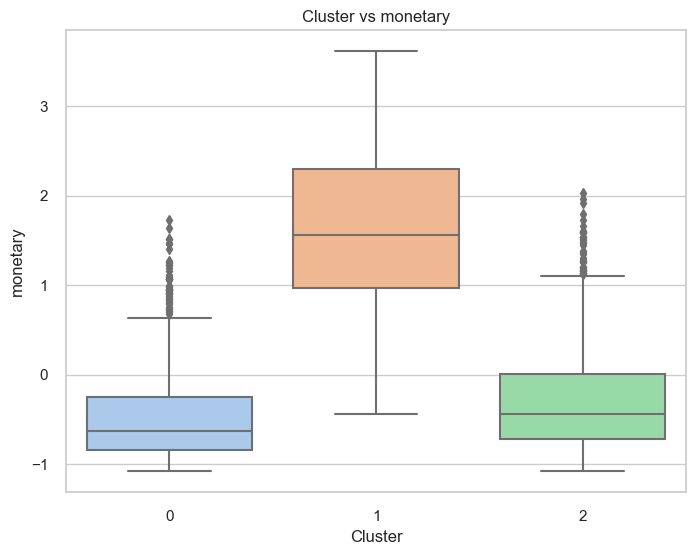

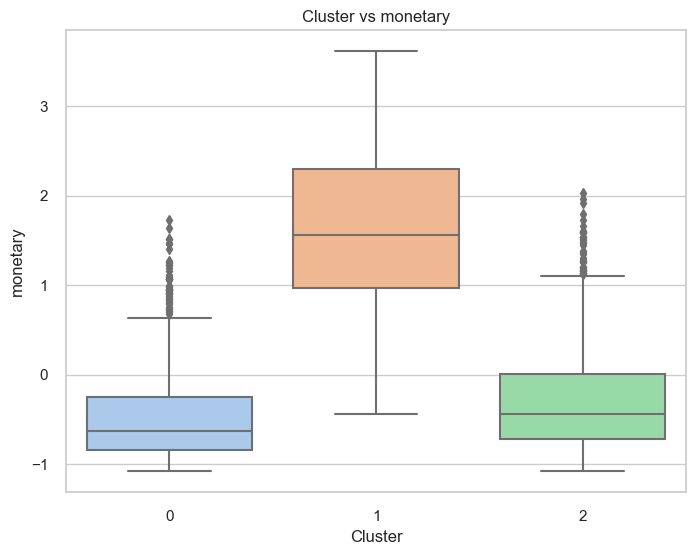

In [911]:
plot_cluster_vs_recency(rmf_ac)
plot_cluster_vs_recency(rmf_ac)
plot_cluster_vs_recency(rmf_ac)

In [912]:
rmf_result

recency  frequency  monetary  kmean_cluster  hc_cluster  \
0    -0.183566  -0.423903  1.202604              0           3   
1    -0.820970   0.471164  1.152186              0           3   
2     2.444330  -0.722259 -0.655649              3           2   
3    -0.619685   0.726897  2.102996              1           1   
4     1.258981  -0.999303 -0.967381              3           2   
...        ...        ...       ...            ...         ...   
3606 -0.205931  -0.892748 -0.859533              2           3   
3607  2.075306  -0.871436 -0.851022              3           2   
3608  0.990601  -0.935370 -0.977773              3           2   
3609 -0.943978  -0.828814 -0.854261              2           3   
3610 -0.552589   0.407231  1.253467              0           3   

      db_scan_cluster  ac_cluster  
0                   0           2  
1                   0           1  
2                   0           0  
3                   0           1  
4                   0           0  
...               ...         ...  
3606                0           2  
3607                0           0  
3608                0           0  
3609                0           2  
3610                0           1  

[3611 rows x 7 columns]

# Gaussian Mixture 

In [913]:
from sklearn.mixture import GaussianMixture

In [914]:
def gaussian_mixture_clustering(X, n_clusters):
    # Create a Gaussian Mixture model with the specified number of clusters
    gmm = GaussianMixture(n_components=n_clusters)

    # Fit the model to the data
    gmm.fit(X)

    # Predict the cluster labels for the data
    labels = gmm.predict(X)

    # Return the DataFrame with cluster labels
    return labels

labels=gaussian_mixture_clustering(rmf_data,n_clusters=3)

In [915]:
rmf_data

recency  frequency  monetary
0    -0.183566  -0.423903  1.202604
1    -0.820970   0.471164  1.152186
2     2.444330  -0.722259 -0.655649
3    -0.619685   0.726897  2.102996
4     1.258981  -0.999303 -0.967381
...        ...        ...       ...
3606 -0.205931  -0.892748 -0.859533
3607  2.075306  -0.871436 -0.851022
3608  0.990601  -0.935370 -0.977773
3609 -0.943978  -0.828814 -0.854261
3610 -0.552589   0.407231  1.253467

[3611 rows x 3 columns]

In [916]:
rmf_gmm=rmf_data.copy()

In [917]:
rmf_gmm['cluster']=labels

In [918]:
rmf_gmm

recency  frequency  monetary  cluster
0    -0.183566  -0.423903  1.202604        1
1    -0.820970   0.471164  1.152186        1
2     2.444330  -0.722259 -0.655649        2
3    -0.619685   0.726897  2.102996        1
4     1.258981  -0.999303 -0.967381        2
...        ...        ...       ...      ...
3606 -0.205931  -0.892748 -0.859533        2
3607  2.075306  -0.871436 -0.851022        2
3608  0.990601  -0.935370 -0.977773        2
3609 -0.943978  -0.828814 -0.854261        2
3610 -0.552589   0.407231  1.253467        1

[3611 rows x 4 columns]

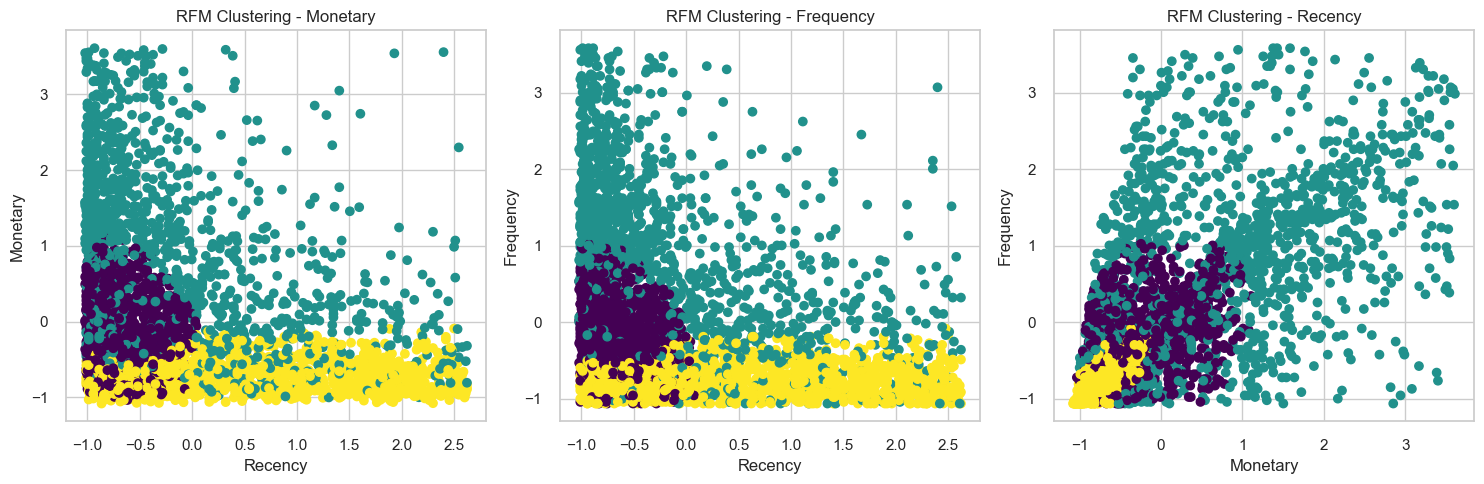

In [919]:
plot_rfm_clusters(rmf_gmm)

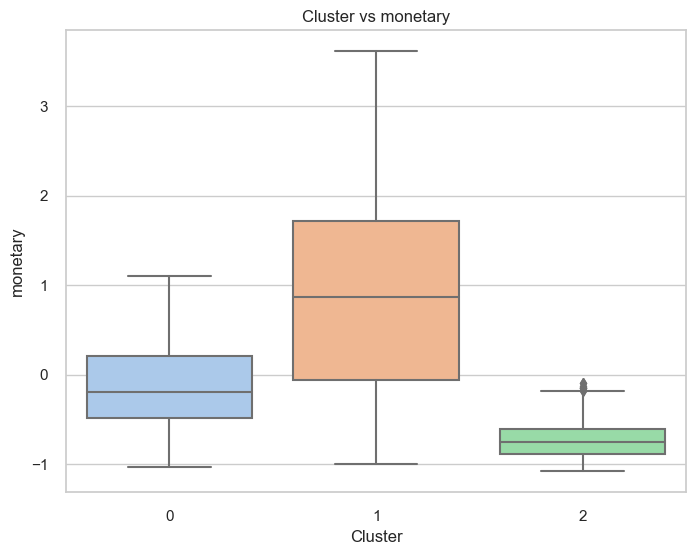

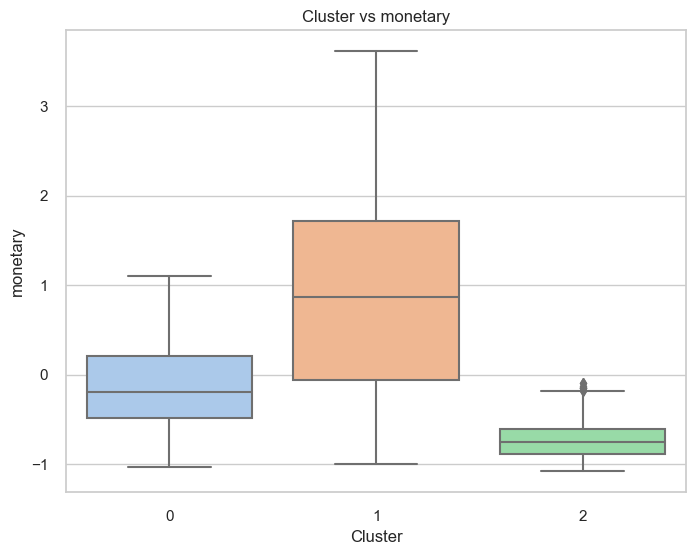

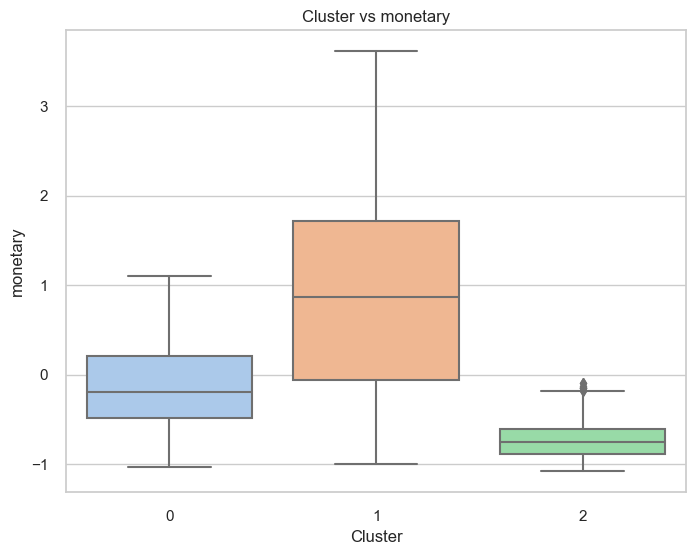

In [920]:
plot_cluster_vs_recency(rmf_gmm)
plot_cluster_vs_recency(rmf_gmm)
plot_cluster_vs_recency(rmf_gmm)

In [921]:
rmf_result['gmm_cluster']=rmf_gmm['cluster']

# Evaluation

In [929]:
rmf_result

recency  frequency  monetary  kmean_cluster  hc_cluster  \
0    -0.183566  -0.423903  1.202604              0           3   
1    -0.820970   0.471164  1.152186              0           3   
2     2.444330  -0.722259 -0.655649              3           2   
3    -0.619685   0.726897  2.102996              1           1   
4     1.258981  -0.999303 -0.967381              3           2   
...        ...        ...       ...            ...         ...   
3606 -0.205931  -0.892748 -0.859533              2           3   
3607  2.075306  -0.871436 -0.851022              3           2   
3608  0.990601  -0.935370 -0.977773              3           2   
3609 -0.943978  -0.828814 -0.854261              2           3   
3610 -0.552589   0.407231  1.253467              0           3   

      db_scan_cluster  ac_cluster  gmm_cluster  
0                   0           2            1  
1                   0           1            1  
2                   0           0            2  
3                   0           1            1  
4                   0           0            2  
...               ...         ...          ...  
3606                0           2            2  
3607                0           0            2  
3608                0           0            2  
3609                0           2            2  
3610                0           1            1  

[3611 rows x 8 columns]

In [930]:
rmf_table_copy=rmf_result.copy()

In [931]:
columns=['kmean_cluster','hc_cluster','db_scan_cluster','ac_cluster']

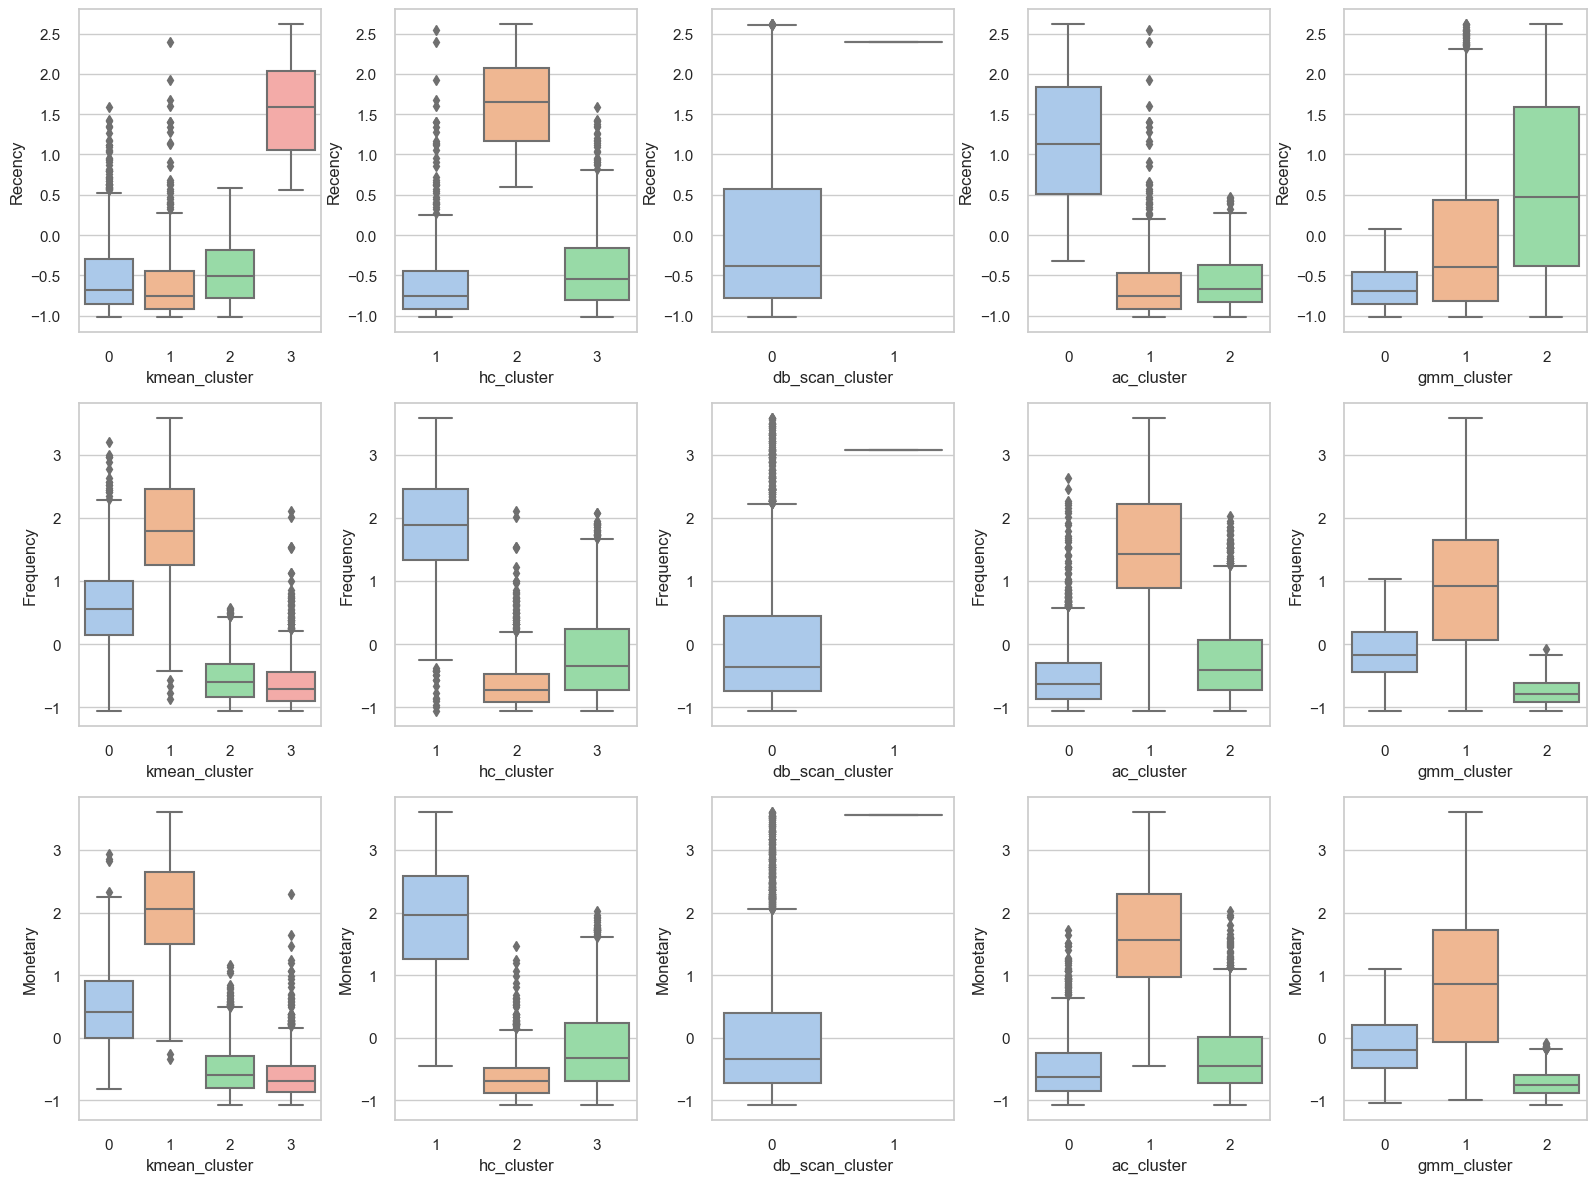

In [932]:
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.pyplot as plt
import seaborn as sns

def plot_cluster_vs_recency(dataframe):
    columns = ['kmean_cluster', 'hc_cluster', 'db_scan_cluster', 'ac_cluster','gmm_cluster']
    rmf_columns = ['recency', 'frequency', 'monetary']
    
    sns.set(style="whitegrid", palette="pastel")
    fig, axes = plt.subplots(nrows=len(rmf_columns), ncols=len(columns), figsize=(16, 12))
    
    for i, rmf_col in enumerate(rmf_columns):
        for j, col in enumerate(columns):
            ax = axes[i][j]
            sns.boxplot(x=col, y=rmf_col, data=dataframe, ax=ax)
            ax.set_ylabel(rmf_col.capitalize())
          
    
    plt.tight_layout()
    plt.show()

plot_cluster_vs_recency(rmf_table_copy)

In [933]:
rmf_table_copy

recency  frequency  monetary  kmean_cluster  hc_cluster  \
0    -0.183566  -0.423903  1.202604              0           3   
1    -0.820970   0.471164  1.152186              0           3   
2     2.444330  -0.722259 -0.655649              3           2   
3    -0.619685   0.726897  2.102996              1           1   
4     1.258981  -0.999303 -0.967381              3           2   
...        ...        ...       ...            ...         ...   
3606 -0.205931  -0.892748 -0.859533              2           3   
3607  2.075306  -0.871436 -0.851022              3           2   
3608  0.990601  -0.935370 -0.977773              3           2   
3609 -0.943978  -0.828814 -0.854261              2           3   
3610 -0.552589   0.407231  1.253467              0           3   

      db_scan_cluster  ac_cluster  gmm_cluster  
0                   0           2            1  
1                   0           1            1  
2                   0           0            2  
3                   0           1            1  
4                   0           0            2  
...               ...         ...          ...  
3606                0           2            2  
3607                0           0            2  
3608                0           0            2  
3609                0           2            2  
3610                0           1            1  

[3611 rows x 8 columns]

Silhouste Score

The Silhouette score takes into account both the cohesion within clusters (how close the data points are to each other within a cluster) and the separation between clusters (how well the data points are separated from other clusters). A higher Silhouette score indicates better separation and cohesion, suggesting more distinct and well-separated clusters.

In [934]:
from sklearn.metrics import silhouette_score
import pandas as pd
def calculate_silhouette_scores(rfm_df, cluster_labels):
    silhouette_data = []
    for cluster_label in cluster_labels:
        cluster_data = rfm_df[cluster_label]
        unique_labels = cluster_data.unique()
        
        if len(unique_labels) < 2:
            continue
        
        silhouette_scores = silhouette_score(rfm_df, cluster_data)
        silhouette_data.append({'Algorithm': cluster_label, 'Silhouette Score': silhouette_scores})
    
    silhouette_df = pd.DataFrame(silhouette_data)
    return silhouette_df

# Example usage
cluster_labels = ['kmean_cluster', 'hc_cluster', 'db_scan_cluster', 'ac_cluster', 'gmm_cluster']
silhouette_df = calculate_silhouette_scores(rfm_df=rmf_table_copy, cluster_labels=cluster_labels)


In [935]:
silhouette_df

Algorithm  Silhouette Score
0    kmean_cluster          0.451148
1       hc_cluster          0.394930
2  db_scan_cluster          0.438987
3       ac_cluster          0.414812
4      gmm_cluster          0.296657

1. Disregarding Db scan Cluster as Number of clusters are very low 
2. Hirarechal clustering models has no predict method
3. Considering two models Kmean and Gmm models 

Kmeans Perform better than GMM 